# PAPER

In [ ]:
!pip install imbalanced-ensemble
!pip uninstall scikit-learn --y
!pip install scikit-learn==1.2.2
!pip install imblearn
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 99.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 74.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-ensemble 0.2.1 requires scikit-learn>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.


## Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import time
import imbens
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.metrics import confusion_matrix
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
from IPython import display
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import StratifiedKFold, KFold


from google.colab import files

import warnings
warnings.filterwarnings('ignore')

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive

RANDOM_STATE = 42

## Importing and reading our Dataset

> Let's read the CSV file.



In [ ]:
# Upload Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Specify the Kaggle dataset path
dataset_path = 'ealaxi/paysim1'

# Download the dataset
!kaggle datasets download -d $dataset_path

# Unzip the dataset
!unzip -q paysim1.zip

# Load the dataset into a Pandas DataFrame
fraud = pd.read_csv('PS_20174392719_1491204439457_log.csv')

 98% 175M/178M [00:08<00:00, 24.0MB/s]
100% 178M/178M [00:08<00:00, 21.0MB/s]




> Now let's take a look at the first 5 rows of the dataset to have a clear picture about dataset.



In [ ]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0




> Now we will use the info function to see the datatypes and number of instances in our dataset.



In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB




> Let's use the shape function that returns the shape of our dataset.



In [ ]:
fraud.shape

(6362620, 11)

**Insights**
* The dataset consist of **11 columns**.
* We have **5 columns** of float datatype.
* We have **3 columns** of integer datatype.
* We have **3 columns** of object datatype.
* The dataset contains **6362620** rows and **11** columns of data.


## Data Cleaning

> It's quite important to have a look at the missing values of the the dataset. We will remove them or interpolate those missing values if we find any. Let's use missingo library function to do this task.

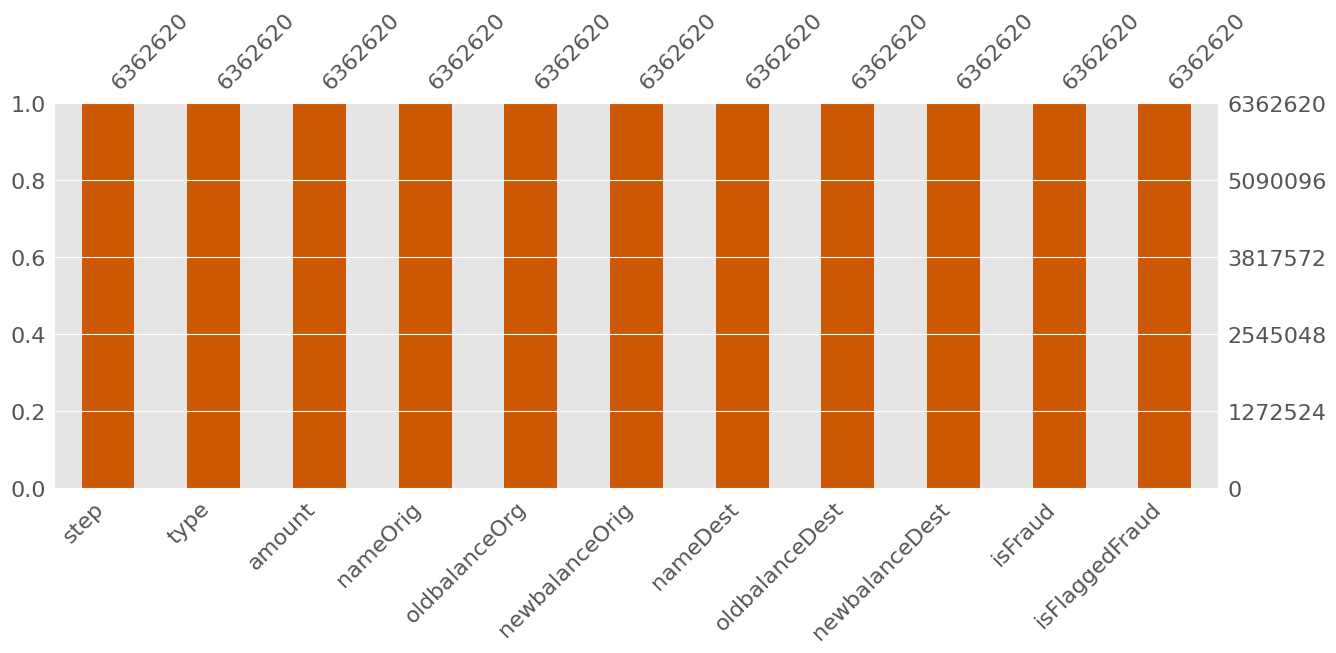

In [ ]:
plt.figure(figsize = (15, 8))
msno.bar(fraud, figsize = (15,5), sort = 'ascending', color = "#cc5803")
plt.show()

> It's time to use the duplication function to make sure if there are any duplicated values in the dataset or not.

In [ ]:
print('Number of duplicates are : ', fraud.duplicated().sum())

Number of duplicates are :  0


> Let's have a look at the column names to see if they need any correction or not. We usually do this to see typo errors.

In [ ]:
fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

> Now, let's rename some of the column names by using rename function.

In [ ]:
fraud = fraud.rename(columns = {'nameOrig' : 'origin', 'oldbalanceOrg' : 'sender_old_balance',
                                'newbalanceOrig': 'sender_new_balance', 'nameDest' : 'destination',
                                'oldbalanceDest' : 'receiver_old_balance', 'newbalanceDest': 'receiver_new_balance',
                                'isFraud' : 'isfraud'})

> It's also good to drop down the non essential columns from a dataset. We will do this with the help of drop function.

In [ ]:
fraud = fraud.drop(columns = ['step', 'isFlaggedFraud'], axis = 'columns')

> Now it's time to move the target column to our desired location in the dataset.

In [ ]:
cols = fraud.columns.tolist()
new_position = 3

cols.insert(new_position, cols.pop(cols.index('destination')))
fraud = fraud[cols]

> By using the head function, let's be assure of the changes we have done so far.

In [ ]:
fraud.head()

,type,amount,origin,destination,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,9839.64,C1231006815,M1979787155,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,M2044282225,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,C553264065,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,C38997010,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,M1230701703,41554.0,29885.86,0.0,0.0,0


**Insights**
* First of all we realized that no single
 column in our dataset had any null values. It means that our dataset was a clean dataset or the missing values were already taken care of.
* Second, we saw that our dataset does not have any duplicate values.
* Then we renamed some of our columns and changed their positions for our comfort and better understanding.




## Exploratory Data Analysis

> Now let's make a barplot to see the fraud and non fraud transactions in different transactions type

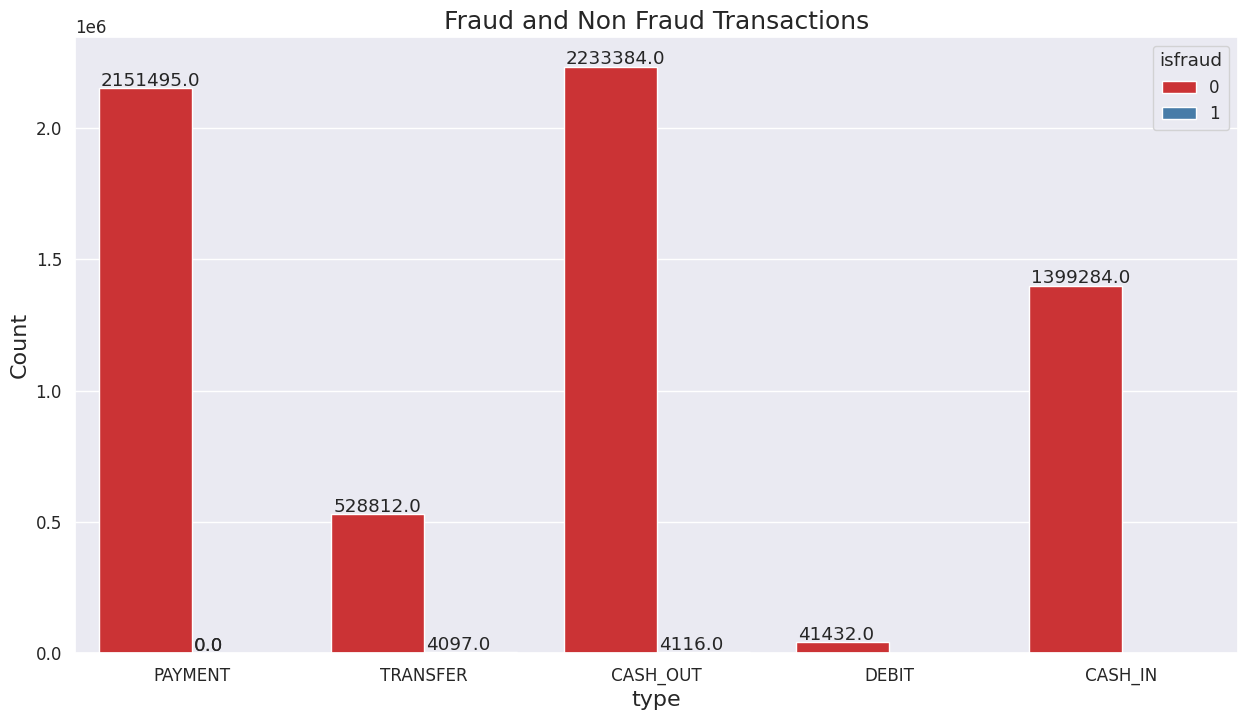

In [ ]:
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.1)

ax=sns.countplot(data = fraud, x = "type", hue="isfraud", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions', fontsize=18)
plt.xlabel("type", fontsize=16)
plt.ylabel("Count", fontsize=16)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

> Checking the origin from where the transactions were made.

In [ ]:
transfer_fraud = fraud[((fraud['type']=='TRANSFER') & fraud['isfraud']==1)]
transfer_fraud['origin'].value_counts()

origin
C1685995037    1
C369775274     1
C1524194171    1
C871130115     1
C1631161002    1
              ..
C1364127192    1
C669700766     1
C1872047468    1
C1093223281    1
C1440057381    1
Name: count, Length: 4097, dtype: int64

> Checking the destination from where the transactions were cashed out.

In [ ]:
cash_out_fraud = fraud[(fraud['type'] == 'CASH_OUT') & (fraud['isfraud'] == 1)]
cash_out_fraud['destination'].value_counts()

destination
C1650668671    2
C967226405     2
C2129197098    2
C964377943     2
C185805228     2
              ..
C1955464150    1
C1104137869    1
C377165949     1
C576226769     1
C742045843     1
Name: count, Length: 4091, dtype: int64

CASH_OUT and TRANSFER transactions have a total of 8188 fraud transactions

> Checking if the transfer and receiving account were same.

In [ ]:
fraud_trans = fraud[fraud['isfraud'] == 1]
valid_trans = fraud[fraud['isfraud'] == 0]

trans_transfer = fraud[fraud['type'] == 'TRANSFER']
trans_cashout = fraud[fraud['type'] == 'CASH_OUT']

print('Has the receiving account used for cashing out?')
trans_transfer.destination.isin(trans_cashout.origin).any()

Has the receiving account used for cashing out?


True

**Insights**
* Our fraud transactions are done in **TRANSFER** and **CASH_OUT** transaction type.
* The fraud transactions in **TRANSFER** were **4097** and **CASH_OUT** were **4091**.
* The **fraud** transactions were generally from **Customer to Customer**
* The transactions account used for **Receiving and Sending was not the Same** in case of **Fraud transactions**.

## Feature Engineering

> Now we can do feature engineering to make another column that seems to be helpful for later Machine Learning tasks.

In [ ]:
# customer C, Merchant M
data = fraud.copy()
data['type2'] = np.nan
data.loc[fraud.origin.str.contains('C') & fraud.destination.str.contains('C'), 'type2'] = 'CC'
data.loc[fraud.origin.str.contains('C') & fraud.destination.str.contains('M'), 'type2'] = 'CM'
data.loc[fraud.origin.str.contains('M') & fraud.destination.str.contains('C'), 'type2'] = 'MC'
data.loc[fraud.origin.str.contains('M') & fraud.destination.str.contains('M'), 'type2'] = 'MM'

> Changing the column position for our ease of use.

In [ ]:
cols = data.columns.tolist()
new_position = 1

cols.insert(new_position, cols.pop(cols.index('type2')))
data = data[cols]

> Again, dropping the irrelevant columns.

In [ ]:
data.drop(columns = ['origin','destination'], axis = 'columns', inplace = True)

> Using the head function to have a new look of the dataset.

In [ ]:
data.head()

,type,type2,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,CM,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,CM,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,CC,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,CC,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,CM,11668.14,41554.0,29885.86,0.0,0.0,0


> Now we are going to see the number of fraud and valid transactions according to the type 2 that tells if the transaction was done from customer to customer, customer to merchant, merchant to customer or merchant to merchant.



In [ ]:
fraud_trans = data[data['isfraud'] == 1]
valid_trans = data[data['isfraud'] == 0]

print('Number of fraud transactions according to type are below:\n', fraud_trans.type2.value_counts(), '\n')
print('Number of valid transactions according to type are below:\n', valid_trans.type2.value_counts())

Number of fraud transactions according to type are below:
 type2
CC    8213
Name: count, dtype: int64 

Number of valid transactions according to type are below:
 type2
CC    4202912
CM    2151495
Name: count, dtype: int64


**Insights**
* At first, we did some feature engineering and introduced a new column **type2** that contained the type of transaction between **Customers and Merchants**.
* Then, we adjusted the column position and dropped some columns that were no longer of use.
* The total number of valid transactions is **6354407**
* The number of **Fraud Transactions** in total were **8213** and were made from **Customer to Customer**.
* The number of **Valid Transactions** made from **Customer to Customer** are **4202912**.
* The number of **Valid Transactions** made from **Customer to Merchant** are **2151495**.

## Data Visualization

In [ ]:
fr = fraud_trans.type2.value_counts()
va = valid_trans.type2.value_counts()

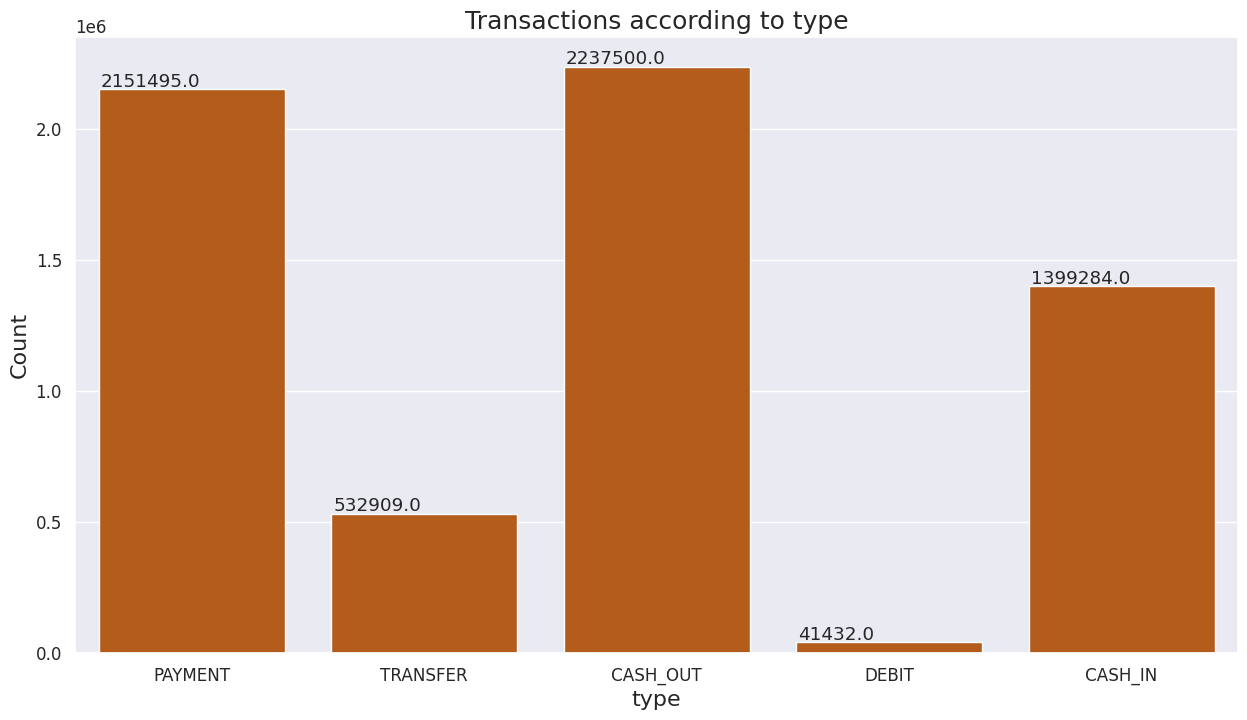

In [ ]:
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.1)

ax=sns.countplot(data = data, x = "type", color='#cc5803')
plt.title('Transactions according to type', fontsize=18)
plt.xlabel("type", fontsize=16)
plt.ylabel("Count", fontsize=16)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

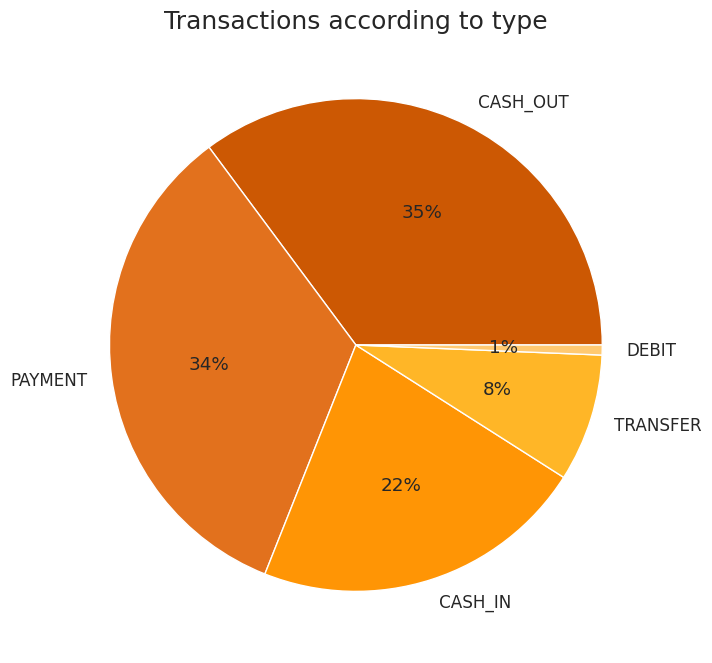

In [ ]:
plt.figure(figsize=(15,8))
colors = ['#cc5803','#e2711d','#ff9505','#ffb627','#ffc971']
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Transactions according to type", fontsize=18)
plt.show()

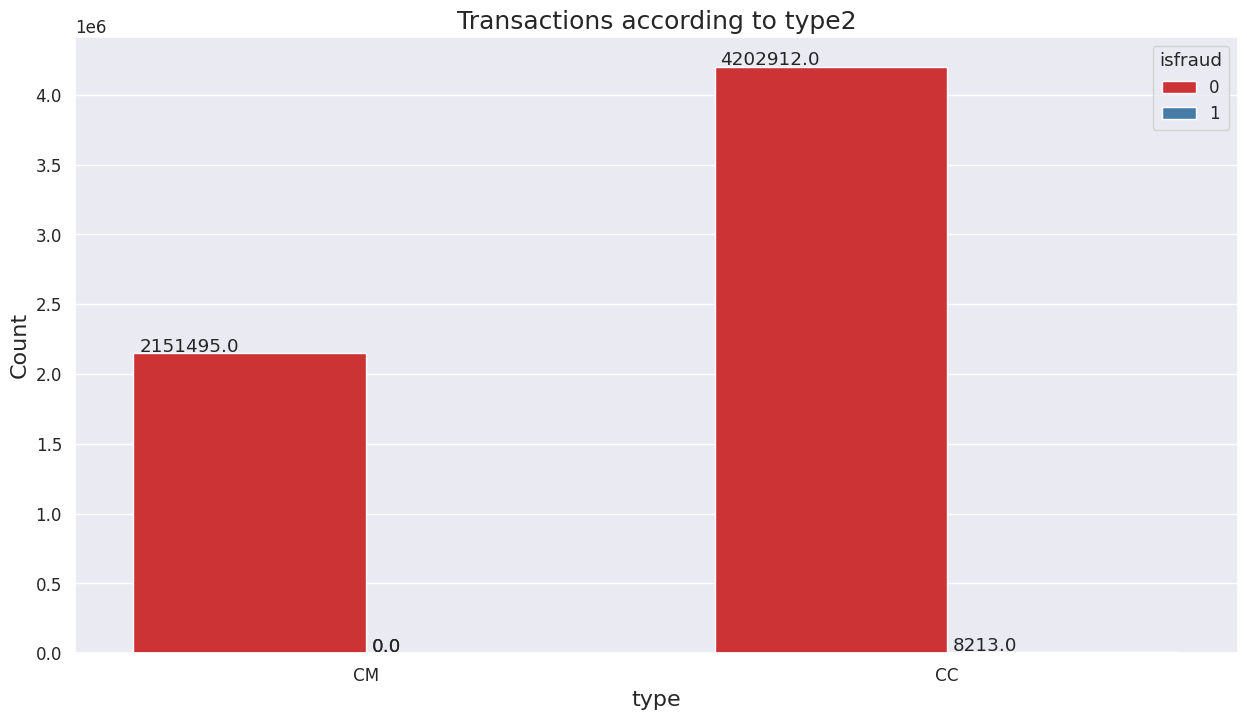

In [ ]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data = data, x = "type2", hue="isfraud", palette = 'Set1')
sns.set(font_scale=1.1)

plt.title('Transactions according to type2', fontsize=18)
plt.xlabel("type", fontsize=16)
plt.ylabel("Count", fontsize=16)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

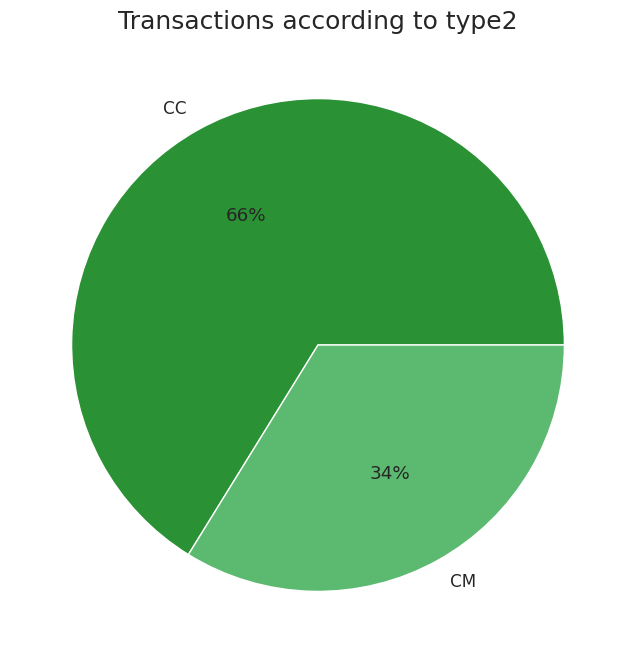

In [ ]:
plt.figure(figsize=(15,8))
colors = ['#2a9134','#5bba6f']
plt.pie(data.type2.value_counts().values,labels=data.type2.value_counts().index, colors = colors,  autopct='%.0f%%')
plt.title("Transactions according to type2", fontsize=18)
plt.show()

**Insights**
* The first two visualizations contain the number of transactions according to the type of transaction, sender and receiver type.
* Most common transaction type used for transactions = **CASH_OUT** .
* Least common transaction type used for transactions = **DEBIT**.
* Most of the transactions done were **Customer to Customer** .

## Data Preprocessing

> Let's create the dummies for the later process of Machine Learning. I'll use dummy hot encoding as the columns do not have a specific order.

In [ ]:
data.head()

,type,type2,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,CM,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,CM,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,CC,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,CC,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,CM,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
data = pd.get_dummies(data, prefix = ['type', 'type2'], drop_first = True)

In [ ]:
data.head()

,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CM
0,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,True,False,True
1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,True,False,True
2,181.00,181.0,0.00,0.0,0.0,1,False,False,False,True,False
3,181.00,181.0,0.00,21182.0,0.0,1,True,False,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,True,False,True


In [ ]:
data.head()

,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CM
0,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,True,False,True
1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,True,False,True
2,181.00,181.0,0.00,0.0,0.0,1,False,False,False,True,False
3,181.00,181.0,0.00,21182.0,0.0,1,True,False,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,True,False,True


> Now it's time to split the dataset into training and testing part and then do the standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

X = data.drop('isfraud', axis=1)
y = data.isfraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = data.isfraud)
'''
rob_scaler = RobustScaler()
X_train = rob_scaler.fit_transform(X_train)
X_test = rob_scaler.transform(X_test)
'''

'\nrob_scaler = RobustScaler()\nX_train = rob_scaler.fit_transform(X_train)\nX_test = rob_scaler.transform(X_test)\n'

In [ ]:
X.shape

(6362620, 10)

In [ ]:
y.shape

(6362620,)

## Functions

> Below, i'll just create functions for the visualization part.

In [ ]:
def classification_scores_comparison(df):
    # Example data
    models = df['model'].values
    precision_scores = df['precision'].values
    recall_scores = df['recall'].values
    f1_scores = df['f1'].values

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(30, 10))

    # Bar width
    bar_width = 0.2

    # Bar positions
    r1 = np.arange(len(models))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Plot precision scores
    bars1 = ax.bar(r1, precision_scores, width=bar_width, label='Precision', color='blue')
    # Plot recall scores
    bars2 = ax.bar(r2, recall_scores, width=bar_width, label='Recall', color='green')
    # Plot F1 scores
    bars3 = ax.bar(r3, f1_scores, width=bar_width, label='F1 Score', color='orange')

    # Add labels, title, and legend
    ax.set_xticks([r + bar_width for r in range(len(models))])
    ax.set_xticklabels(models, fontsize=12)
    ax.set_xlabel('Models', fontsize=16)
    ax.set_ylabel('Scores', fontsize=16)
    ax.set_title('Comparison of Precision, Recall, and F1 Scores for each model', fontsize=18)
    ax.legend()

    # Annotate each bar with its value
    def annotate_bars(bars, scores):
        for bar, score in zip(bars, scores):
            height = bar.get_height()
            ax.annotate(f'{score:.2f}',  # Text to display
                        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of text
                        xytext=(0, 3),  # Offset text above the bar
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    annotate_bars(bars1, precision_scores)
    annotate_bars(bars2, recall_scores)
    annotate_bars(bars3, f1_scores)

    # Show the plot
    plt.show()

    return

In [ ]:
def plot_classification_report_heatmap(df, model_name):

  plt.figure(figsize=(13, 8))
  sns.heatmap(df.iloc[:3, :3], annot=True, cmap='Blues', fmt=".2f", cbar=True, linewidths=.5, vmin=0, vmax=1)
  sns.set(font_scale=1.1)
  plt.title(model_name + '\nclassification report heatmap', fontsize=18, pad=10, ha='center')
  plt.show()

  return

In [ ]:
def plot_samples_side_by_side(data1, data2, model_name):

    labels = ['Not Fraud', 'Fraud']

    # view previous class distribution
    print(data1.value_counts())

    # check new class counts
    print(data2.value_counts())

    # we set our y axis value as the number of rows of our original dataframe (for better understanding of sampling techniques)
    y_axis_value = X.shape[0]

    # Create pandas Series for data
    series1 = pd.Series(data1.value_counts(), name='Counts')
    series2 = pd.Series(data2.value_counts(), name='Counts')

    # Create figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    # Plot bar plot for data1
    bars1 = axs[0].bar(labels, series1, color=['#C8373A', '#4A7CA6'])
    axs[0].set_ylim(0, y_axis_value)
    axs[0].set_title('Train dataframe', fontsize=16)

    # Plot bar plot for data2
    bars2 = axs[1].bar(labels, series2, color=['#C8373A', '#4A7CA6'])
    axs[1].set_ylim(0, y_axis_value)
    axs[1].set_title('Resampled dataframe', fontsize=16)

    # Annotate each bar with its value for subplot 1
    for bar in bars1:
        height = bar.get_height()
        axs[0].annotate('{}'.format(height),
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

    # Annotate each bar with its value for subplot 2
    for bar in bars2:
        height = bar.get_height()
        axs[1].annotate('{}'.format(height),
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

    # Set big title in the center
    plt.suptitle('Comparison of Samples\n' + model_name, fontsize=18, fontweight='bold')

    # Show plot
    plt.tight_layout()
    plt.show()
    return

In [ ]:
def plot_classification_scores(df, model_name):

  data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Score': [df.iloc[0,0], df.iloc[0,1], df.iloc[0,2]]
    }
  df = pd.DataFrame(data)

  # Plot the bar graph and show values on top of each bar
  plt.figure(figsize=(13, 8))
  ax = sns.barplot(x='Metric', y='Score', data=df, palette=['blue','green','orange'])
  sns.set(font_scale=1.1)

  # Annotate each bar with its value
  for p in ax.patches:
      ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  plt.title(model_name + '\nPrecision, Recall, and F1-Scores', fontsize=18, pad=20, ha='center')

  plt.ylim(0, 1)  # Set y-axis range to 0-1 for precision, recall, and F1-score
  plt.show()
  return

In [ ]:
def px_bar(x,y,text,title,color,color_discrete_sequence):
    return px.bar(x = x, y = y, text = text, title = title, color = color, color_discrete_sequence=color_discrete_sequence)

In [ ]:
confusion_labels = ['0', '1']

def confusion_plot(matrix, model_name, labels=None):

    """ Display binary confusion matrix as a Seaborn heatmap """

    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    plt.figure(figsize = (13, 8))
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    sns.set(font_scale=1.1)
    ax.set_xlabel('PREDICTED', fontsize=16)
    ax.set_ylabel('ACTUAL', fontsize=16)
    plt.title(model_name + '\nconfusion matrix', fontsize=18, pad=10, ha='center')
    plt.close()

    return fig

In [ ]:
def plot_roc_curve(clf_name, y_test, clf_pred_proba):

  fpr, tpr, temp = roc_curve(y_test, clf_pred_proba)
  auc = round(roc_auc_score(y_test, clf_pred_proba),3)
  plt.figure(figsize=(13,8))
  plt.plot(fpr,tpr,label= str(clf_name)+', AUC='+str(auc),linestyle='solid',color='#800000')
  plt.plot([0, 1], [0, 1], color = 'g')
  plt.title('ROC Curve', fontsize=18)
  plt.legend(loc='upper right')
  return

In [ ]:
def append_model_to_table(tn, fp, fn, tp, clf_report, clf_name, execution_time, df):

    minutes = int(execution_time // 60)
    seconds = int(execution_time % 60)

    new_row = {
        'model': clf_name,
        'execution_Time': f"{minutes:02d}:{seconds:02d}",
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'precision': round(clf_report['Fraud']['precision'], 3),
        'recall': round(clf_report['Fraud']['recall'], 3),
        'f1': round(clf_report['Fraud']['f1-score'], 3),
        'support_Not_Fraud': int(clf_report['Not Fraud']['support']),
        'support_Fraud': int(clf_report['Fraud']['support'])
    }

    df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    return df

In [ ]:
def plot_compare_f1_scores(df):

    plt.figure(figsize=(13, 8))
    bars = plt.bar(df['model'], df['f1'], color='orange')
    plt.xlabel('Model', fontsize=16)
    plt.ylabel('F1 Score', fontsize=16)
    plt.title('Comparison of F1 Scores', fontsize=18)

    # Annotate each bar with its F1 score
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 3)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=12)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return

In [ ]:
def calculate_auc_prc(y_test, y_proba):
      # Calculating AUCPRC score

      # Compute precision and recall values for different threshold values
      precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

      # Calculate the AUCPRC score
      auc_prc = auc(recall, precision)

      return auc_prc

# Function to calculate evaluation metrics
def calculate_metrics(y_test, y_pred, y_pred_proba):

    report = classification_report(y_test, y_pred, output_dict=True)
    precision = (round(report['1']['precision'], 3))
    recall = (round(report['1']['recall'], 3))
    f1 = (round(report['1']['f1-score'], 3))
    aucprc = (round(calculate_auc_prc(y_test, y_pred_proba), 3))
    gmean = (round(geometric_mean_score(y_test, y_pred), 3))
    mcc = (round(matthews_corrcoef(y_test, y_pred), 3))

    return precision, recall, f1, aucprc, gmean, mcc


def kfold_classifier(model_name, model, X, y, df):

    kfold = StratifiedKFold(n_splits=10, shuffle=True)

    # Initialize lists to store evaluation metrics
    precision_scores = []
    recall_scores = []
    f1_scores = []
    aucprc_scores = []
    gmean_scores = []
    mcc_scores = []

    # Perform k-fold cross-validation and compute evaluation metrics for each fold
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Fit the classifier and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        # Calculate evaluation metrics for the current fold
        precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)
        # Append metrics to the respective lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        aucprc_scores.append(aucprc)
        gmean_scores.append(gmean)
        mcc_scores.append(mcc)

    # Calculate the mean classification report across all folds
    mean_precision = round(np.mean(precision_scores), 3)
    mean_recall = round(np.mean(recall_scores), 3)
    mean_f1 = round(np.mean(f1_scores), 3)
    mean_aucprc = round(np.mean(aucprc_scores), 3)
    mean_gmean = round(np.mean(gmean_scores), 3)
    mean_mcc = round(np.mean(mcc_scores), 3)

    std_precision = round(np.std(precision_scores), 3)
    std_recall = round(np.std(recall_scores), 3)
    std_f1 = round(np.std(f1_scores), 3)
    std_aucprc = round(np.std(aucprc_scores), 3)
    std_gmean = round(np.std(gmean_scores), 3)
    std_mcc = round(np.std(mcc_scores), 3)

    print(f1_scores)

    new_row = {
    'model': model_name,
    'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
    'f1': str(mean_f1) + ' ± ' + str(std_f1),
    'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
    'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
    'precision': str(mean_precision) + ' ± ' + str(std_precision),
    'recall': str(mean_recall) + ' ± ' + str(std_recall)
    }

    df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    return df


In [ ]:
df_models = pd.DataFrame(columns=['model', 'execution_Time', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect', 'precision', 'recall', 'f1', 'support_Not_Fraud', 'support_Fraud'])

In [ ]:
df_kfold_models = pd.DataFrame(columns=['model', 'aucprc', 'f1', 'gm', 'mcc', 'precision', 'recall'])

## Model Building

> We will now use 4 ML models and train them. Later we will append each model into the list.

In [ ]:
#XGBClassifier(colsample_bytree = 1, gamma = 0.0, learning_rate = 0.2, max_depth = 10, n_estimators = 100, scale_pos_weight = 1) -> 0.859 BEST!

#from sklearn.model_selection import GridSearchCV
#from xgboost import XGBClassifier

## Define the parameter grid
#param_grid = {
#    'learning_rate': [0.01, 0.1, 0.2],
#    'n_estimators': [100],
#    'max_depth': [5, 7, 10],
#    'colsample_bytree': [1],
#    'gamma': [0.0, 0.05, 0.1, 0.2],
#    'scale_pos_weight' : [1, 3, 5, 10]
#    # Add more parameters to tune
#}

## Perform grid search
#grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, scoring='f1')
#grid_search.fit(X_train, y_train)

## Get the best parameters
#best_params = grid_search.best_params_

## Evaluate the model
#best_f1_score = grid_search.best_score_

In [ ]:
#rf = RandomForestClassifier(n_estimators = 15, n_jobs = -1, random_state = 42)
#lgbm = LGBMClassifier(boosting_type = 'gbdt',objective = 'binary', random_state = 8888)
#xgb = XGBClassifier(colsample_bytree = 1, gamma = 0.0, learning_rate = 0.2, max_depth = 10, n_estimators = 100, scale_pos_weight = 1, random_state = RANDOM_STATE)
#logreg = LogisticRegression(solver = 'liblinear', random_state = 42)
#dt = DecisionTreeClassifier(random_state = 42)
gbdt = GradientBoostingClassifier()

classifiers = []
#classifiers.append((dt, 'Decision Tree'))
#classifiers.append((rf, 'Random Forest Classifier'))
#classifiers.append((lgbm, 'LGBM Classifier'))
#classifiers.append((xgb, 'XGBoost Classifier'))
#classifiers.append((logreg, 'Logistic Regression Classifier'))
classifiers.append((gbdt, 'Gradient Boosting Decision Tree'))

> Let's do the prediction and find out the precision, recall, and F1 scores of each model. We also add the results to a table to observe the results.

In [ ]:
for tuple in classifiers:

    start_time = time.time()
    tuple[0].fit(X_train, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    y_pred = tuple[0].predict(X_test)
    clf_report = classification_report(y_pred, y_test, target_names=['Not Fraud','Fraud'], output_dict=True)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    df_models = append_model_to_table(tn, fp, fn, tp, clf_report, tuple[1], execution_time, df_models)
    df_kfold_models = kfold_classifier(tuple[1], tuple[0], X, y, df_kfold_models)

[0.054, 0.538, 0.05, 0.099, 0.805, 0.516, 0.526, 0.532, 0.098, 0.054]


In [ ]:
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.0,0.007,1272518,6


In [ ]:
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.345 ± 0.223,0.327 ± 0.268,0.564 ± 0.269,0.362 ± 0.251,0.455 ± 0.305,0.392 ± 0.267


In [ ]:
df_models_result = df_models.iloc[:, [ 0, 8, 9, 10]]
df_models_result

,model,precision,recall,f1
0,Gradient Boosting Decision Tree,0.004,1.0,0.007


> Let's call the function to plot and see the precision, recall, and F1 score values of each model.

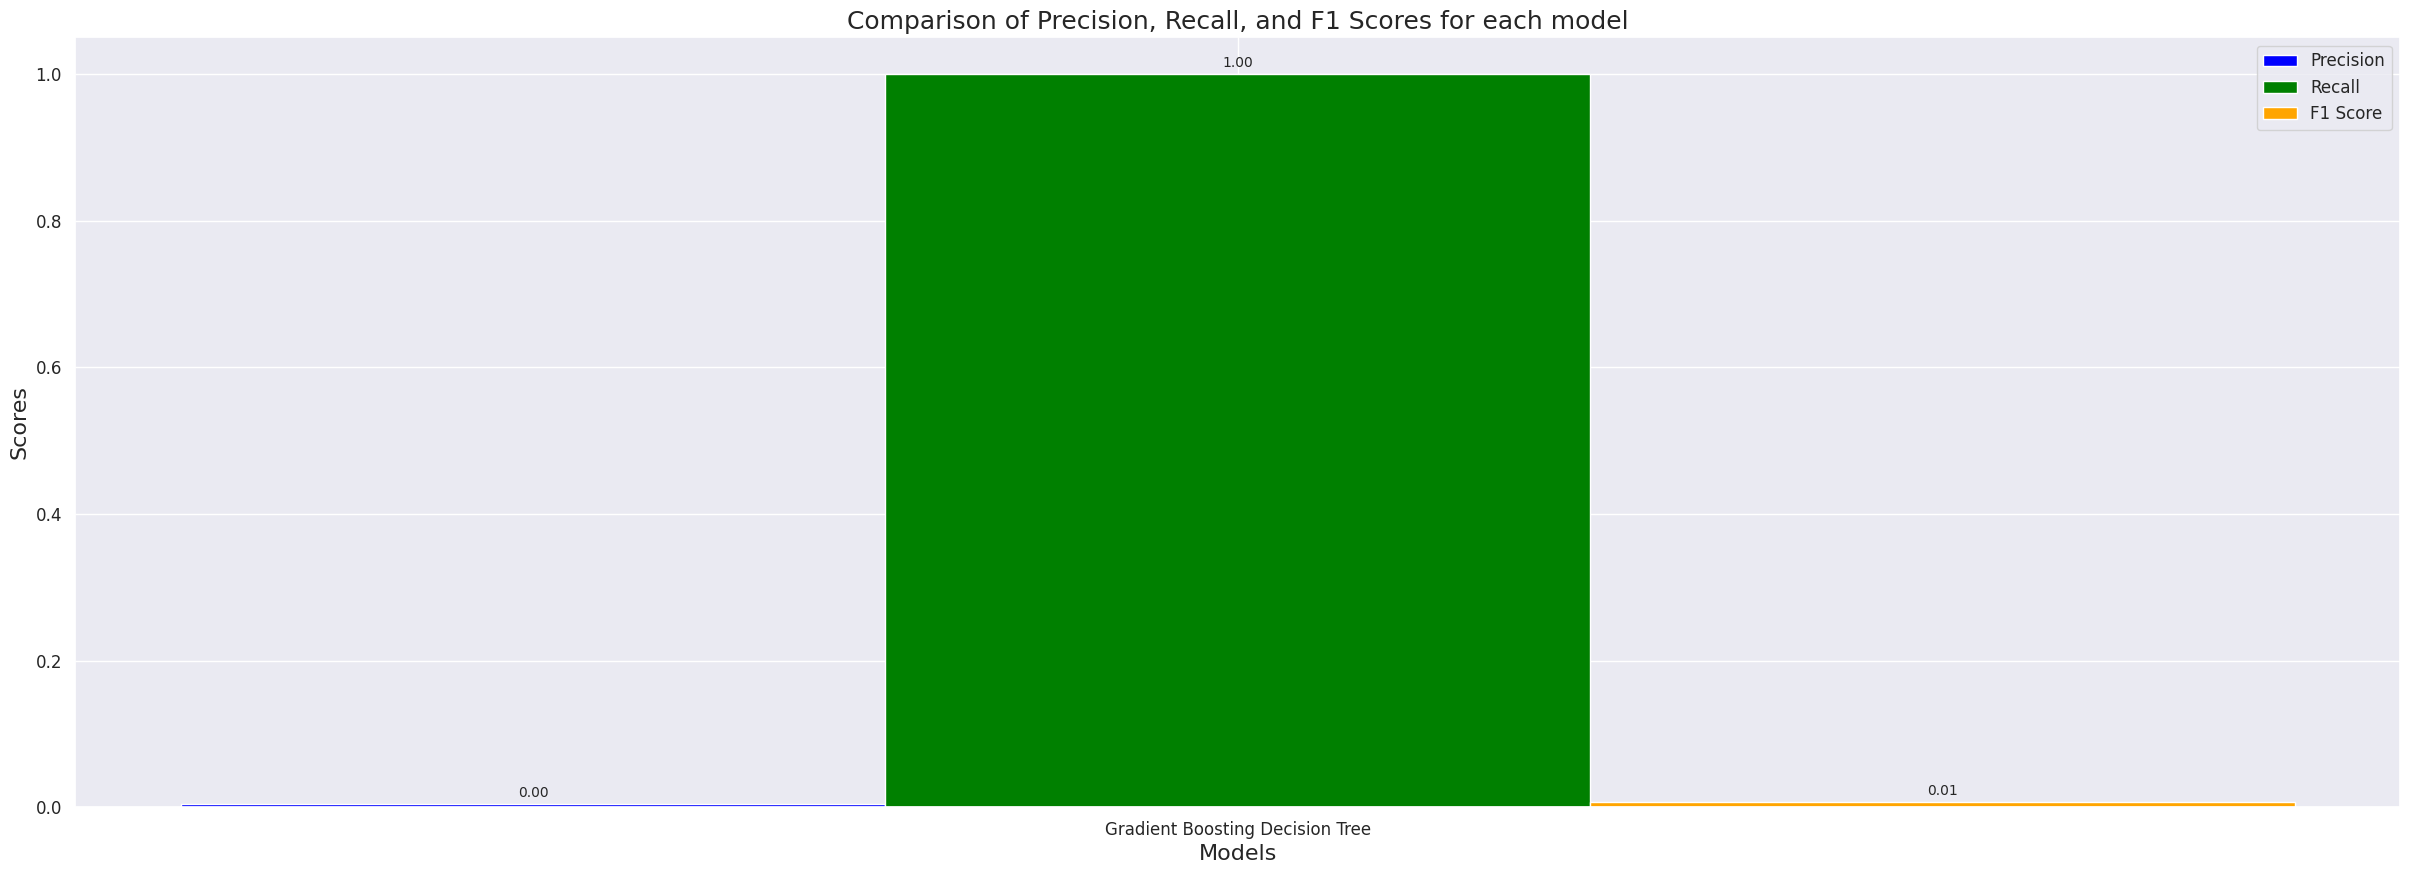

In [ ]:
classification_scores_comparison(df_models_result)

In [ ]:
df_models_f1_scores = df_models_result.iloc[:,[0, 3]]
df_models_f1_scores_sorted = df_models_f1_scores.sort_values(by='f1', ascending=True)

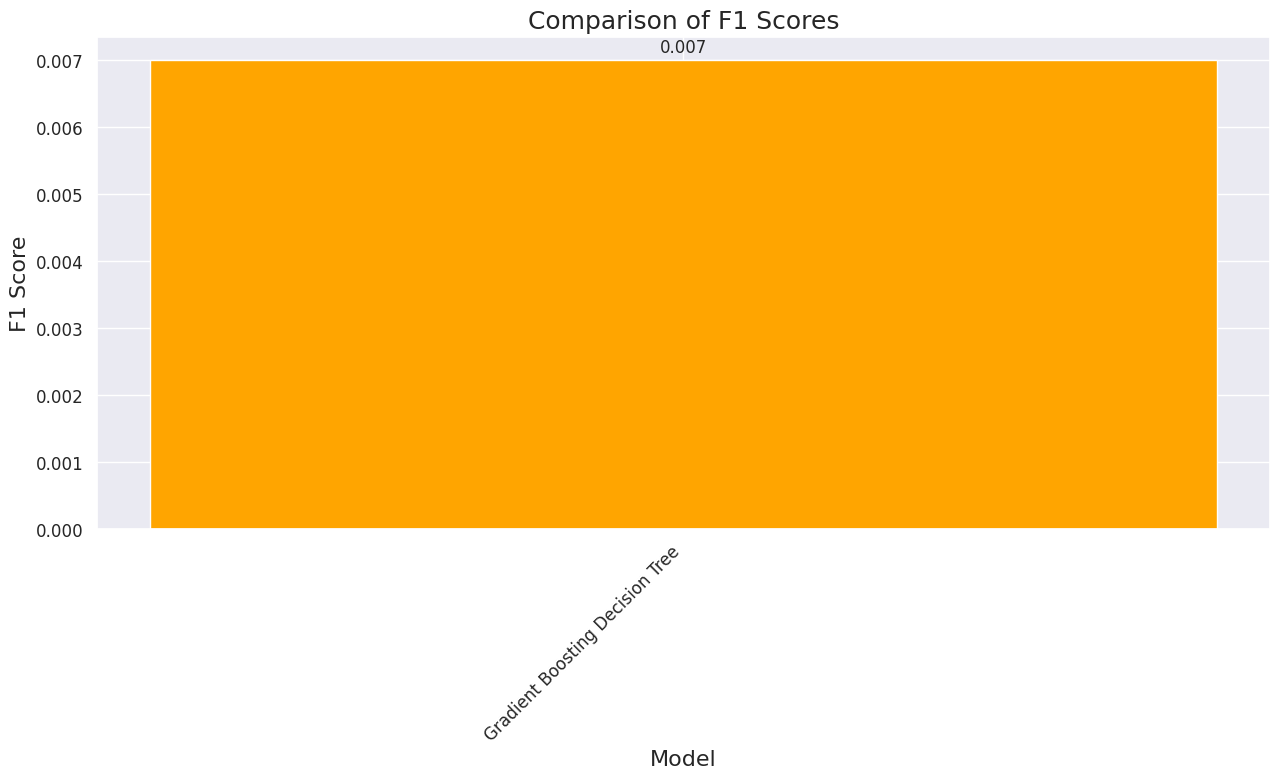

In [ ]:
plot_compare_f1_scores(df_models_f1_scores_sorted)

## Methods for Dealing with Imbalanced Data

**Insights**
* XGBoost and Random Forest Classifier have similar results but XGBoost takes much less time to execute and it also has a slightly superior roc_auc score. We decided that we are gonna use XGBoost for the rest of the project.

Here are some ways Data Resampling helps:



1.   Class Imbalance Correction: It helps correct class imbalance issues in classification tasks. It ensures that each class has an appropriate representation in the dataset, preventing the model from being biased towards the majority class.
2.   Model Training and Validation: Resampling techniques can help ensure that models are trained and validated on datasets with a balanced distribution of classes. It leads to more reliable and unbiased model evaluations.
3.  Enhanced Generalization: It can improve a model’s ability to generalize to new, unseen data, especially for underrepresented classes, by providing more learning examples.  

## Model Evaluation

### Gradient Boosting Decision Tree Classifier

###Resampling Techniques — Oversampling Minority Class w/ Gradient Boosting Decision Tree Classifier

Important Note
Always split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [ ]:
from sklearn.utils import resample

model_name = 'Oversampling Minority Class GBDT'

X = data.drop('isfraud', axis=1)
y = data.isfraud

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = data.isfraud)


In [ ]:
X.head()

,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CM
0,9839.64,170136.0,160296.36,0.0,0.0,False,False,True,False,True
1,1864.28,21249.0,19384.72,0.0,0.0,False,False,True,False,True
2,181.00,181.0,0.00,0.0,0.0,False,False,False,True,False
3,181.00,181.0,0.00,21182.0,0.0,True,False,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,False,False,True,False,True


In [ ]:
# concatenate our training data back together
df = pd.concat([X_train, y_train], axis=1)
df.head()

,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CM,isfraud
292779,9914.74,44248.00,34333.26,0.00,0.00,False,False,True,False,True,0
499763,6854.53,0.00,0.00,0.00,0.00,False,False,True,False,True,0
2970411,361211.80,0.00,0.00,489745.16,850956.95,True,False,False,False,False,0
3137549,7083.51,0.00,0.00,0.00,0.00,False,False,True,False,True,0
1500682,218019.51,13045685.58,13263705.09,2438123.98,2220104.47,False,False,False,False,False,0


In [ ]:
# separate minority and majority classes
not_fraud = df[df.isfraud==0]
fraud = df[df.isfraud==1]

# upsample minority
start_time_1 = time.time()
fraud_oversampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=42) # reproducible results
end_time_1 = time.time()

# combine majority and upsampled minority
oversampled = pd.concat([not_fraud, fraud_oversampled])

isfraud
0    5083526
1       6570
Name: count, dtype: int64
isfraud
0    5083526
1    5083526
Name: count, dtype: int64


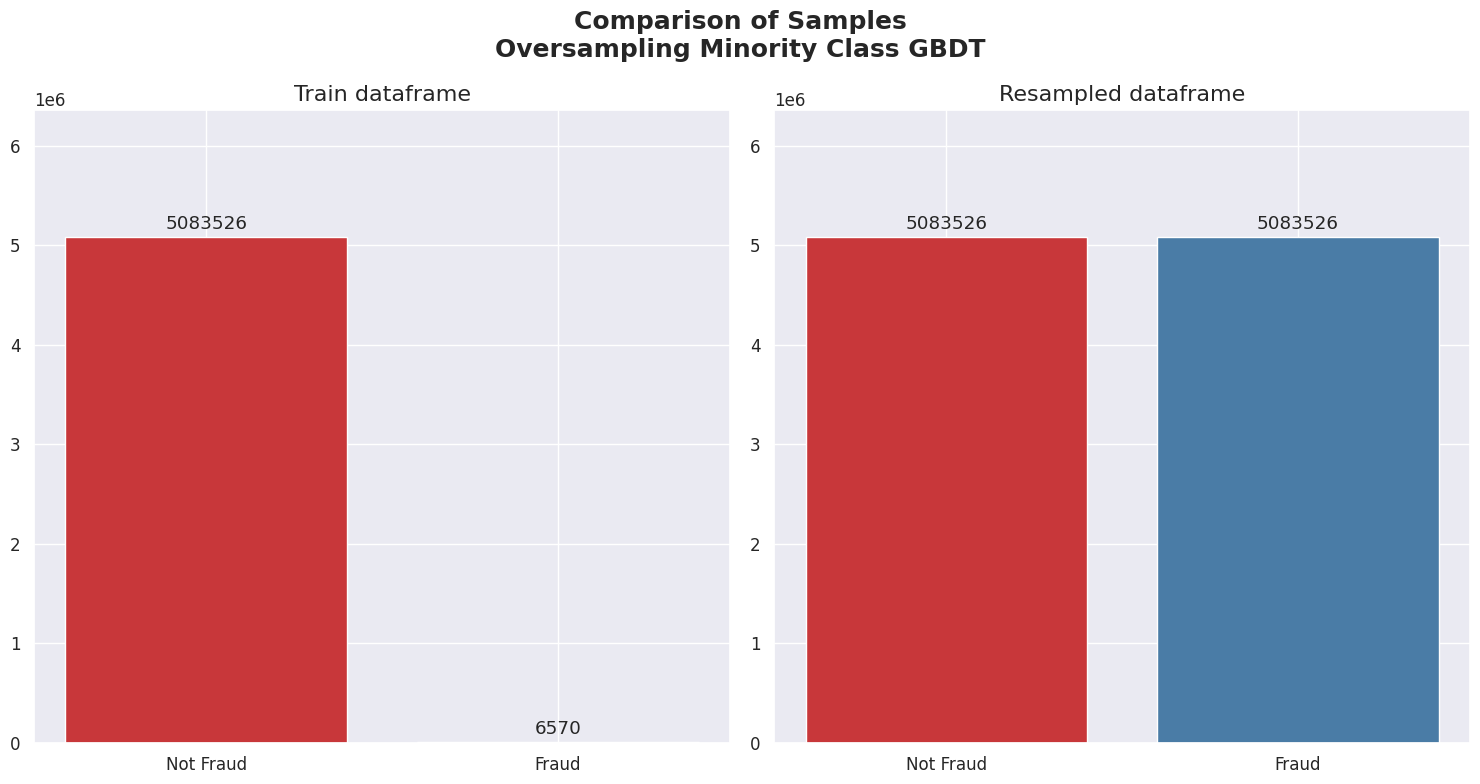

In [ ]:
plot_samples_side_by_side(y_train, oversampled.isfraud, model_name)



> After resampling we have an equal ratio of data points for each class! Let’s try our XGBoost again with the balanced training data.



In [ ]:
# trying GBDT again with the balanced dataset

y_train_oversampled = oversampled.isfraud
X_train_oversampled = oversampled.drop('isfraud', axis=1)

start_time_2 = time.time()
oversampled = gbdt.fit(X_train_oversampled, y_train_oversampled)
end_time_2 = time.time()

execution_time = (end_time_1 - start_time_1) + (end_time_2 - start_time_2)

oversampled_pred = oversampled.predict(X_test)

In [ ]:
oversampled_report = classification_report(y_test, oversampled_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_oversampled = pd.DataFrame(oversampled_report).transpose()
df_oversampled = df_oversampled.drop('macro avg', axis=0)
df_oversampled = df_oversampled.drop('weighted avg', axis=0)
df_oversampled = df_oversampled.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99   1270881
       Fraud       0.07      1.00      0.12      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.99      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524



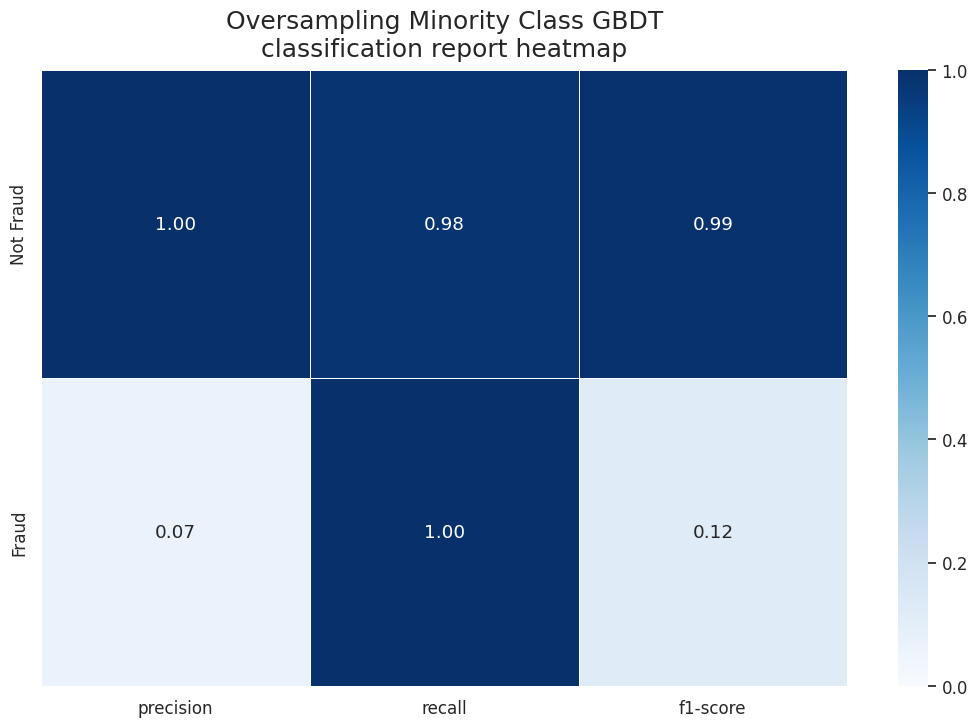

In [ ]:
print(classification_report(y_test, oversampled_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_oversampled, model_name)

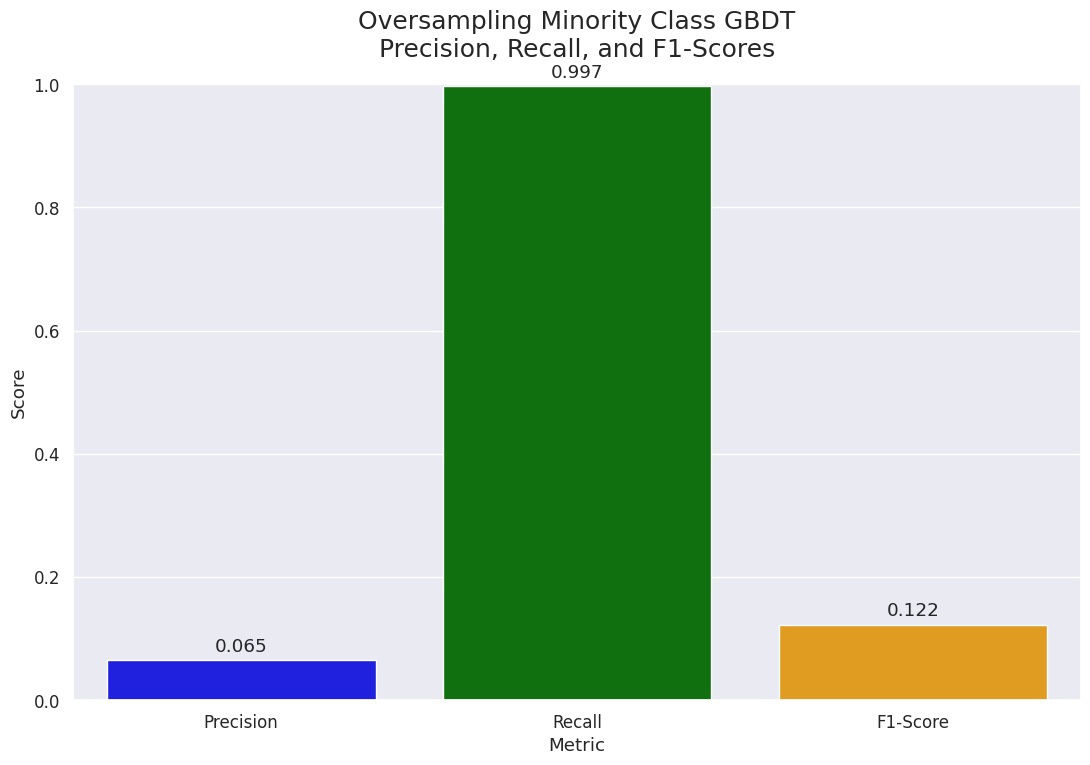

In [ ]:
df_oversampled = df_oversampled.drop('Not Fraud', axis=0)
df_oversampled = df_oversampled.drop('support', axis=1)

plot_classification_scores(df_oversampled, model_name)

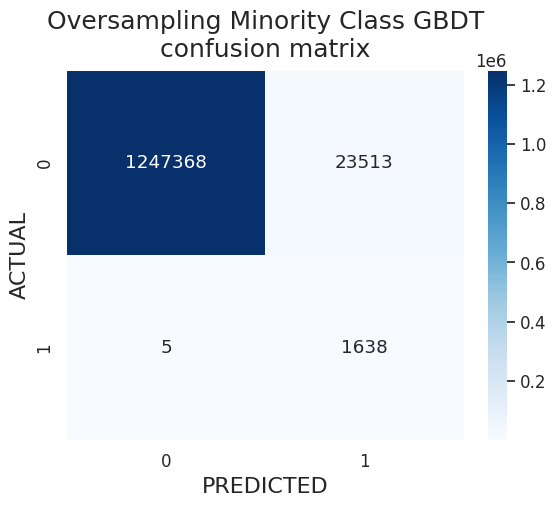

<Figure size 1300x800 with 0 Axes>

In [ ]:
# Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, oversampled_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, oversampled_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, oversampled_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643


In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
aucprc_scores = []
gmean_scores = []
mcc_scores = []

for train_index, test_index in kf.split(X, y):
    # Split data into training and validation folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # separate minority and majority classes
    not_fraud = df[df.isfraud==0]
    fraud = df[df.isfraud==1]

    # Apply oversampling to the training folds
    fraud_oversampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=42)

    oversampled = pd.concat([not_fraud, fraud_oversampled])

    y_train_oversampled = oversampled.isfraud
    X_train_oversampled = oversampled.drop('isfraud', axis=1)

    # Fit the classifier and make predictions
    gbdt.fit(X_train_oversampled, y_train_oversampled)
    y_pred = gbdt.predict(X_test)
    y_pred_proba = gbdt.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics for the current fold
    precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)

    # Append metrics to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    aucprc_scores.append(aucprc)
    gmean_scores.append(gmean)
    mcc_scores.append(mcc)

# Calculate the mean classification report across all folds
mean_precision = round(np.mean(precision_scores), 3)
mean_recall = round(np.mean(recall_scores), 3)
mean_f1 = round(np.mean(f1_scores), 3)
mean_aucprc = round(np.mean(aucprc_scores), 3)
mean_gmean = round(np.mean(gmean_scores), 3)
mean_mcc = round(np.mean(mcc_scores), 3)

std_precision = round(np.std(precision_scores), 3)
std_recall = round(np.std(recall_scores), 3)
std_f1 = round(np.std(f1_scores), 3)
std_aucprc = round(np.std(aucprc_scores), 3)
std_gmean = round(np.std(gmean_scores), 3)
std_mcc = round(np.std(mcc_scores), 3)

new_row = {
'model': model_name,
'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
'f1': str(mean_f1) + ' ± ' + str(std_f1),
'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
'precision': str(mean_precision) + ' ± ' + str(std_precision),
'recall': str(mean_recall) + ' ± ' + str(std_recall)
}

df_kfold_models = pd.concat([df_kfold_models, pd.DataFrame(new_row, index=[0])], ignore_index=True)
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.345 ± 0.223,0.327 ± 0.268,0.564 ± 0.269,0.362 ± 0.251,0.455 ± 0.305,0.392 ± 0.267
1,Oversampling Minority Class GBDT,0.847 ± 0.013,0.121 ± 0.003,0.989 ± 0.001,0.252 ± 0.003,0.065 ± 0.002,0.996 ± 0.002


### Resampling techniques — Undersampling Majority Class w/ Gradient Boosting Decision Tree Classifier

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class.

In [ ]:
model_name = 'Undersampling Majority Class GBDT'

# still using our separated classes fraud and not_fraud from above

# downsample majority
start_time_1 = time.time()
not_fraud_undersampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results
end_time_1 = time.time()

# combine minority and downsampled majority
undersampled = pd.concat([not_fraud_undersampled, fraud])

isfraud
0    5718956
1       7402
Name: count, dtype: int64
isfraud
0    6570
1    6570
Name: count, dtype: int64


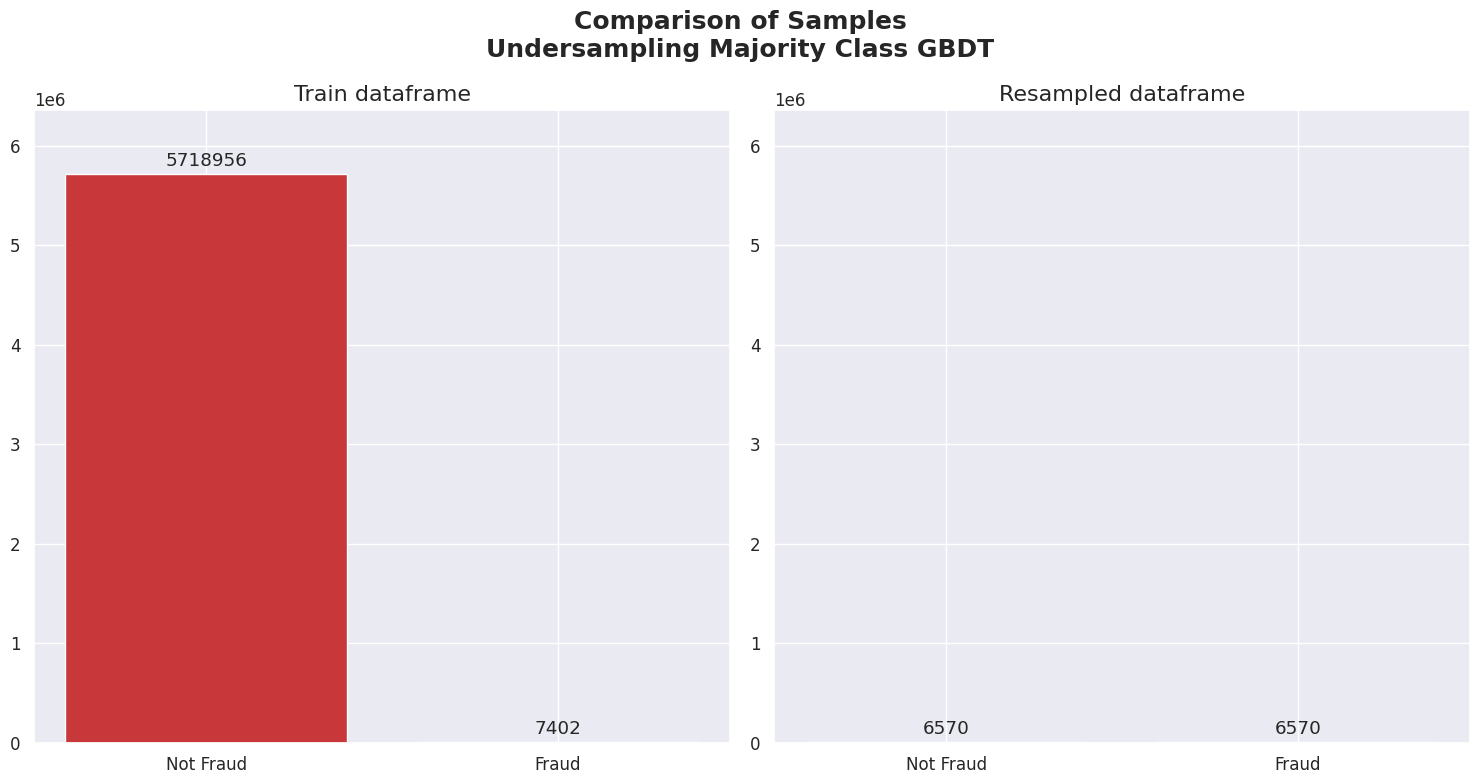

In [ ]:
plot_samples_side_by_side(y_train, undersampled.isfraud, model_name)



> Again, we have an equal ratio of fraud to not fraud data points, but in this case a much smaller quantity of data to train the model on. Let’s again apply our XGBoost classifier.



In [ ]:
# trying GBDT again with the undersampled dataset

y_train_undersampled = undersampled.isfraud
X_train_undersampled = undersampled.drop('isfraud', axis=1)

start_time_2 = time.time()
undersampled = gbdt.fit(X_train_undersampled, y_train_undersampled)
end_time_2 = time.time()

execution_time = (end_time_1 - start_time_1) + (end_time_2 - start_time_2)

undersampled_pred = undersampled.predict(X_test)

In [ ]:
undersampled_report = classification_report(y_test, undersampled_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_undersampled = pd.DataFrame(undersampled_report).transpose()
df_undersampled = df_undersampled.drop('macro avg', axis=0)
df_undersampled = df_undersampled.drop('weighted avg', axis=0)
df_undersampled = df_undersampled.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99    635451
       Fraud       0.06      1.00      0.12       811

    accuracy                           0.98    636262
   macro avg       0.53      0.99      0.55    636262
weighted avg       1.00      0.98      0.99    636262



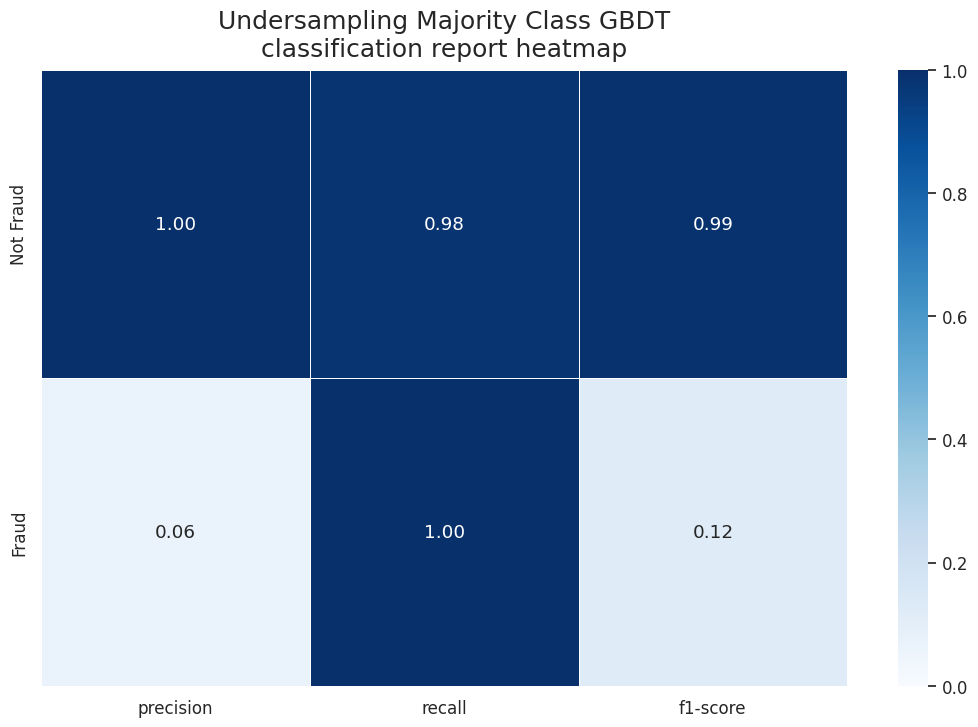

In [ ]:
print(classification_report(y_test, undersampled_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_undersampled, model_name)

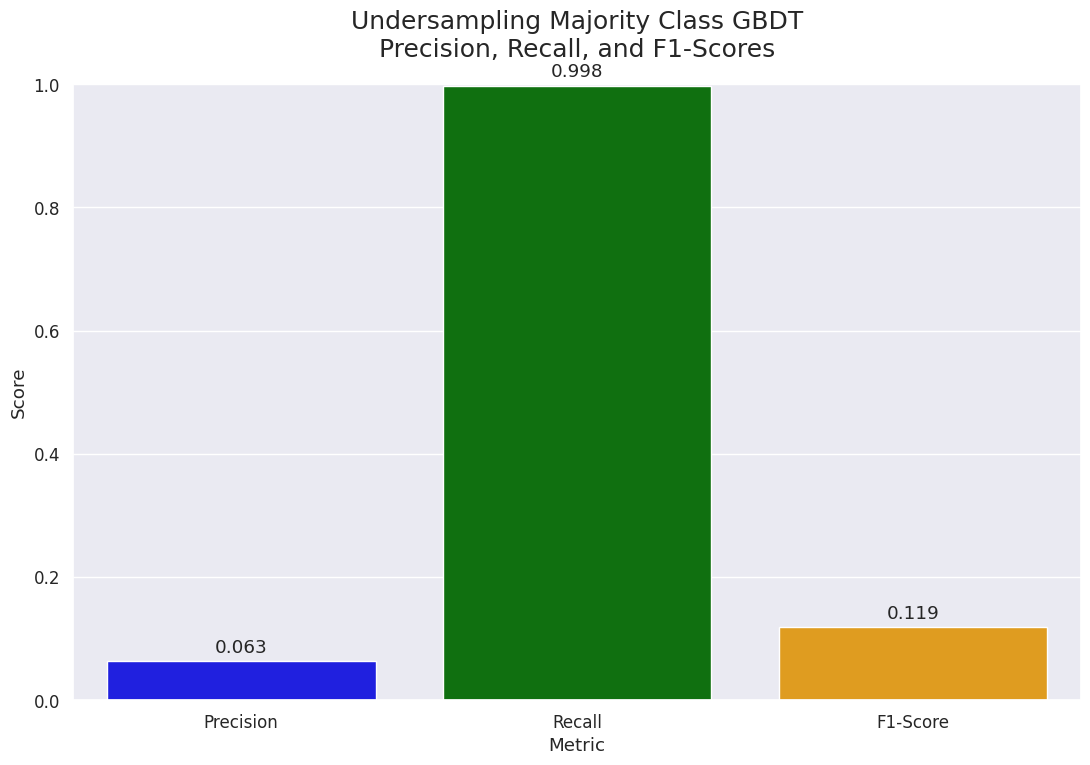

In [ ]:
df_undersampled = df_undersampled.drop('Not Fraud', axis=0)
df_undersampled = df_undersampled.drop('support', axis=1)

plot_classification_scores(df_undersampled, model_name)

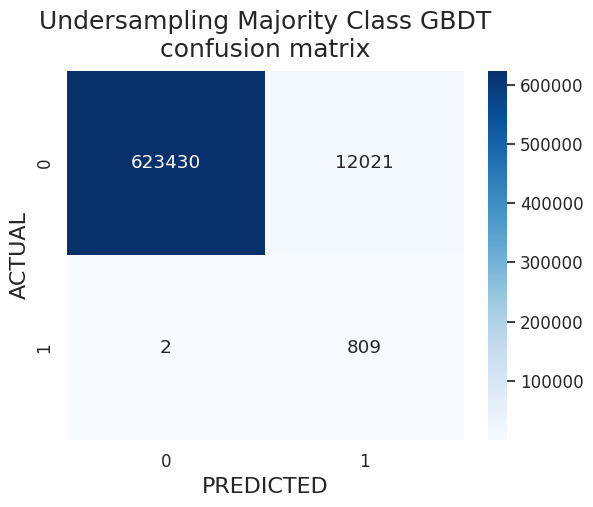

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, undersampled_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, undersampled_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, undersampled_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643
2,Undersampling Majority Class GBDT,00:01,809,623430,12021,2,624239,12023,0.063,0.998,0.119,635451,811


In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
aucprc_scores = []
gmean_scores = []
mcc_scores = []

for train_index, test_index in kf.split(X, y):
    # Split data into training and validation folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply undersampling to the training folds
    not_fraud_undersampled = resample(not_fraud,
                                    replace = False, # sample without replacement
                                    n_samples = len(fraud), # match minority n
                                    random_state = 27) # reproducible results

    undersampled = pd.concat([not_fraud_undersampled, fraud])

    y_train_undersampled = undersampled.isfraud
    X_train_undersampled = undersampled.drop('isfraud', axis=1)

    # Fit the classifier and make predictions
    gbdt.fit(X_train_undersampled, y_train_undersampled)
    y_pred = gbdt.predict(X_test)
    y_pred_proba = gbdt.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics for the current fold
    precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)

    # Append metrics to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    aucprc_scores.append(aucprc)
    gmean_scores.append(gmean)
    mcc_scores.append(mcc)

# Calculate the mean classification report across all folds
mean_precision = round(np.mean(precision_scores), 3)
mean_recall = round(np.mean(recall_scores), 3)
mean_f1 = round(np.mean(f1_scores), 3)
mean_aucprc = round(np.mean(aucprc_scores), 3)
mean_gmean = round(np.mean(gmean_scores), 3)
mean_mcc = round(np.mean(mcc_scores), 3)

std_precision = round(np.std(precision_scores), 3)
std_recall = round(np.std(recall_scores), 3)
std_f1 = round(np.std(f1_scores), 3)
std_aucprc = round(np.std(aucprc_scores), 3)
std_gmean = round(np.std(gmean_scores), 3)
std_mcc = round(np.std(mcc_scores), 3)

new_row = {
'model': model_name,
'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
'f1': str(mean_f1) + ' ± ' + str(std_f1),
'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
'precision': str(mean_precision) + ' ± ' + str(std_precision),
'recall': str(mean_recall) + ' ± ' + str(std_recall)
}

df_kfold_models = pd.concat([df_kfold_models, pd.DataFrame(new_row, index=[0])], ignore_index=True)
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.345 ± 0.223,0.327 ± 0.268,0.564 ± 0.269,0.362 ± 0.251,0.455 ± 0.305,0.392 ± 0.267
1,Oversampling Minority Class GBDT,0.847 ± 0.013,0.121 ± 0.003,0.989 ± 0.001,0.252 ± 0.003,0.065 ± 0.002,0.996 ± 0.002
2,Undersampling Majority Class GBDT,0.522 ± 0.038,0.12 ± 0.003,0.989 ± 0.001,0.25 ± 0.003,0.064 ± 0.002,0.997 ± 0.002




> Undersampling underperformed oversampling in this case. Let’s try one more methods to handle imbalanced data.



###Synthetic Minority Oversampling Technique (SMOTE) w/ Gradient Boosting Decision Tree Classifier

A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

NOTE: It is vital that you do not use SMOTE on the full data set. You MUST use SMOTE on the training set only (after you split). Then validate on your val/test sets and see if your SMOTE model out performed your other model(s). If you do not do this there will be data leakage and your model is essentially cheating.

In [ ]:
from imblearn.over_sampling import SMOTE

model_name = 'SMOTE GBDT'

X = data.drop('isfraud', axis=1)
y = data.isfraud

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = data.isfraud)

sm = SMOTE(sampling_strategy='auto')

start_time_1 = time.time()
X_smoteTrain, y_smoteTrain = sm.fit_resample(X_train, y_train)
end_time_1 = time.time()

isfraud
0    5083526
1       6570
Name: count, dtype: int64
isfraud
0    5083526
1    5083526
Name: count, dtype: int64


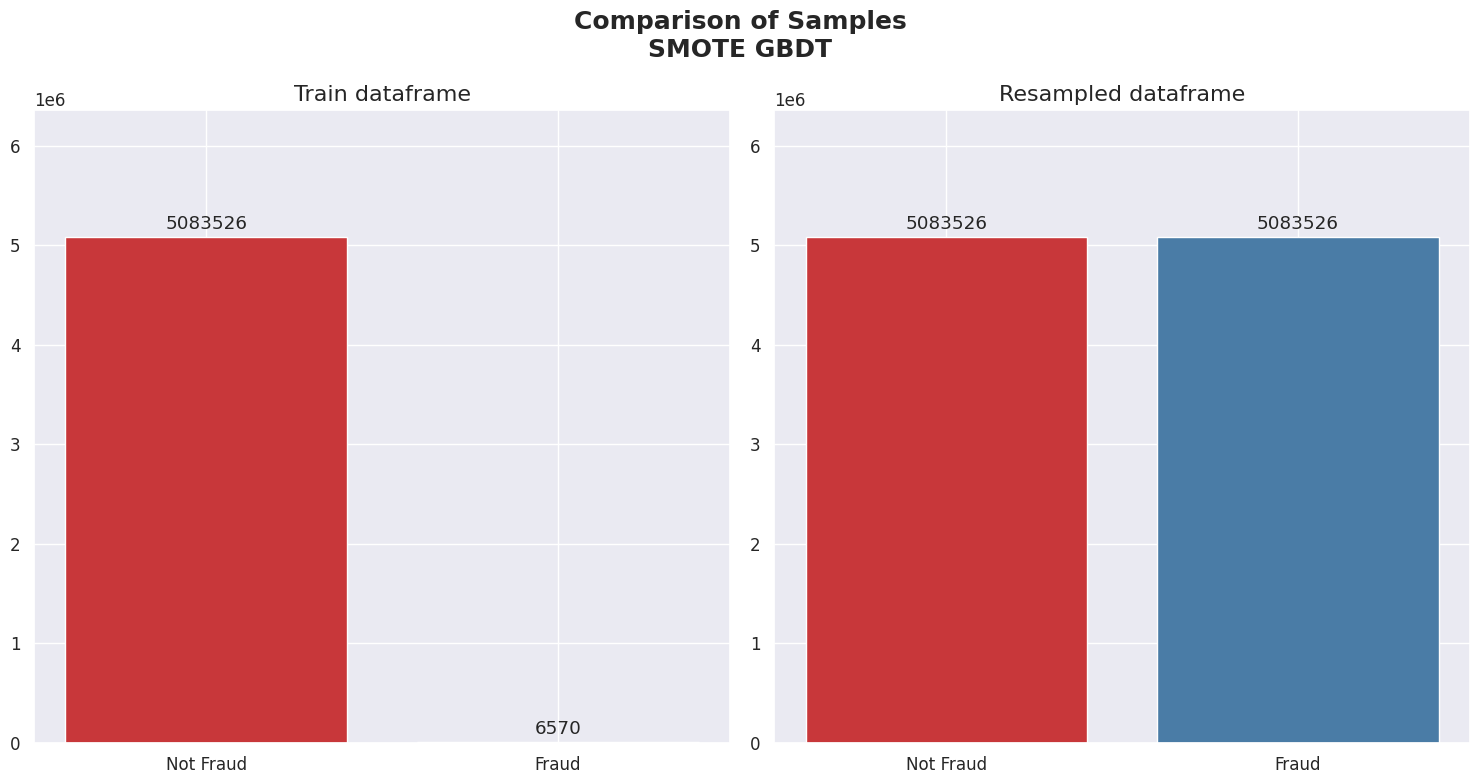

In [ ]:
plot_samples_side_by_side(y_train, y_smoteTrain, model_name)



> After generating our synthetic data points, let’s see how our logistic regression performs.



In [ ]:
start_time_2 = time.time()
smote = gbdt.fit(X_smoteTrain, y_smoteTrain)
end_time_2 = time.time()

execution_time = (end_time_1 - start_time_1) + (end_time_2 - start_time_2)

smote_pred = smote.predict(X_test)

In [ ]:
smote_report = classification_report(y_test, smote_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_smote = pd.DataFrame(smote_report).transpose()
df_smote = df_smote.drop('macro avg', axis=0)
df_smote = df_smote.drop('weighted avg', axis=0)
df_smote = df_smote.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99   1270881
       Fraud       0.07      1.00      0.13      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.99      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524



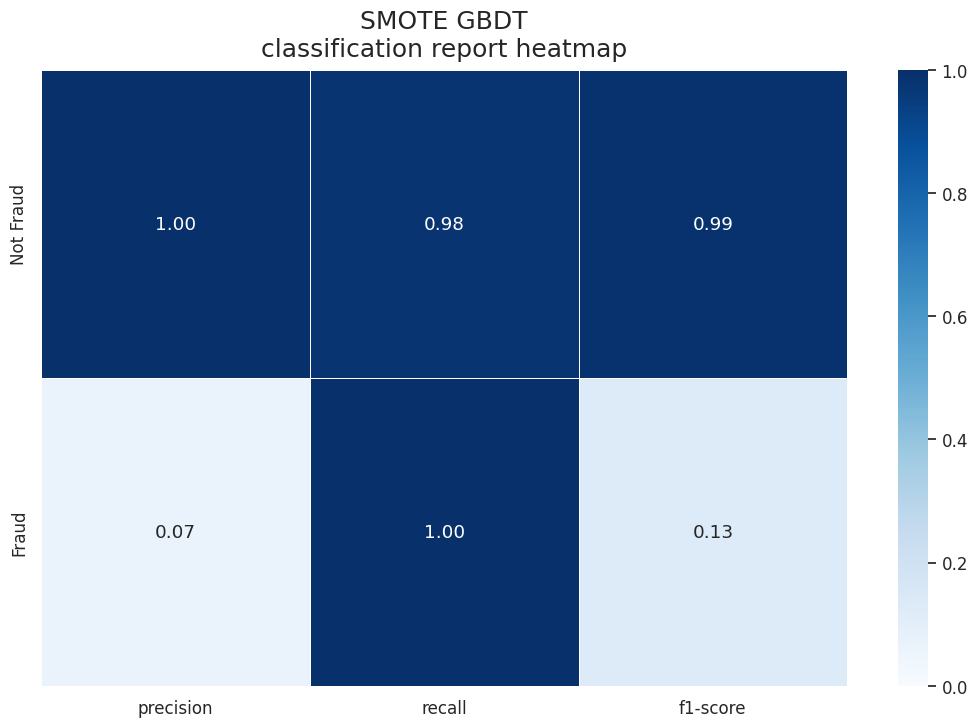

In [ ]:
print(classification_report(y_test, smote_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_smote, model_name)

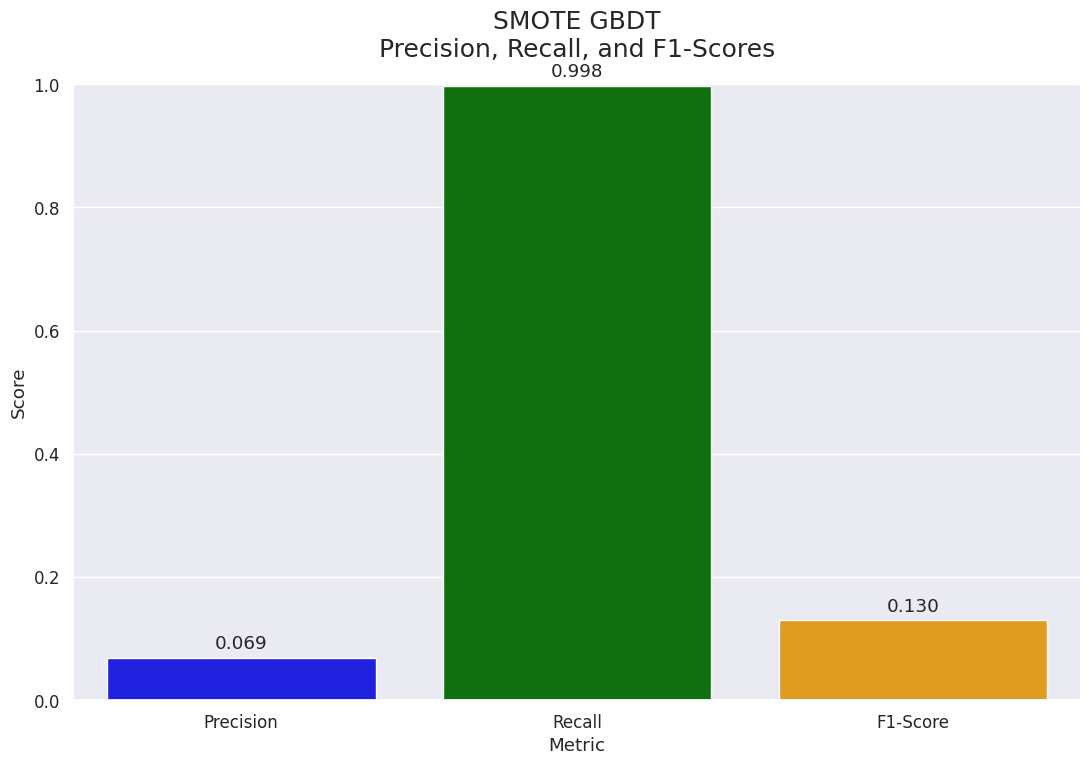

In [ ]:
df_smote = df_smote.drop('Not Fraud', axis=0)
df_smote = df_smote.drop('support', axis=1)

plot_classification_scores(df_smote, model_name)

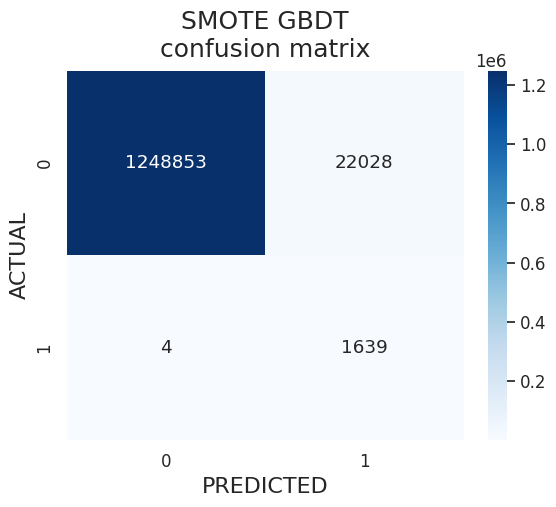

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, smote_pred),
                               model_name,
                               labels=confusion_labels))



> Our F1 score is increased and recall is similar to the upsampled model above and for our data here outperforms undersampling.



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, smote_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, smote_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643
2,Undersampling Majority Class GBDT,00:01,809,623430,12021,2,624239,12023,0.063,0.998,0.119,635451,811
3,SMOTE GBDT,45:23,1639,1248853,22028,4,1250492,22032,0.069,0.998,0.130,1270881,1643


In [ ]:
sm = SMOTE(sampling_strategy='auto')

# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
aucprc_scores = []
gmean_scores = []
mcc_scores = []

for train_index, test_index in kf.split(X, y):
    # Split data into training and validation folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_smoteTrain, y_smoteTrain = sm.fit_resample(X_train, y_train)

    # Fit the classifier and make predictions
    gbdt.fit(X_smoteTrain, y_smoteTrain)
    y_pred = gbdt.predict(X_test)
    y_pred_proba = gbdt.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics for the current fold
    precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)

    # Append metrics to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    aucprc_scores.append(aucprc)
    gmean_scores.append(gmean)
    mcc_scores.append(mcc)

# Calculate the mean classification report across all folds
mean_precision = round(np.mean(precision_scores), 3)
mean_recall = round(np.mean(recall_scores), 3)
mean_f1 = round(np.mean(f1_scores), 3)
mean_aucprc = round(np.mean(aucprc_scores), 3)
mean_gmean = round(np.mean(gmean_scores), 3)
mean_mcc = round(np.mean(mcc_scores), 3)

std_precision = round(np.std(precision_scores), 3)
std_recall = round(np.std(recall_scores), 3)
std_f1 = round(np.std(f1_scores), 3)
std_aucprc = round(np.std(aucprc_scores), 3)
std_gmean = round(np.std(gmean_scores), 3)
std_mcc = round(np.std(mcc_scores), 3)

new_row = {
'model': model_name,
'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
'f1': str(mean_f1) + ' ± ' + str(std_f1),
'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
'precision': str(mean_precision) + ' ± ' + str(std_precision),
'recall': str(mean_recall) + ' ± ' + str(std_recall)
}

df_kfold_models = pd.concat([df_kfold_models, pd.DataFrame(new_row, index=[0])], ignore_index=True)
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.345 ± 0.223,0.327 ± 0.268,0.564 ± 0.269,0.362 ± 0.251,0.455 ± 0.305,0.392 ± 0.267
1,Oversampling Minority Class GBDT,0.847 ± 0.013,0.121 ± 0.003,0.989 ± 0.001,0.252 ± 0.003,0.065 ± 0.002,0.996 ± 0.002
2,Undersampling Majority Class GBDT,0.522 ± 0.038,0.12 ± 0.003,0.989 ± 0.001,0.25 ± 0.003,0.064 ± 0.002,0.997 ± 0.002
3,SMOTE GBDT,0.85 ± 0.013,0.13 ± 0.003,0.989 ± 0.001,0.261 ± 0.003,0.07 ± 0.002,0.995 ± 0.002


###RandomUnderSampler + SMOTE w/ Gradient Boosting Decision Tree Classifier

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

model_name = 'RUS and SMOTE GBDT'

X = df.drop('isfraud', axis=1)
y = df['isfraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = df.isfraud)

start_time_1 = time.time()
# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Apply SMOTE to the resampled data
smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_resampled, y_train_resampled)
end_time_1 = time.time()


isfraud
0    4066820
1       5256
Name: count, dtype: int64
isfraud
0    5256
1    5256
Name: count, dtype: int64


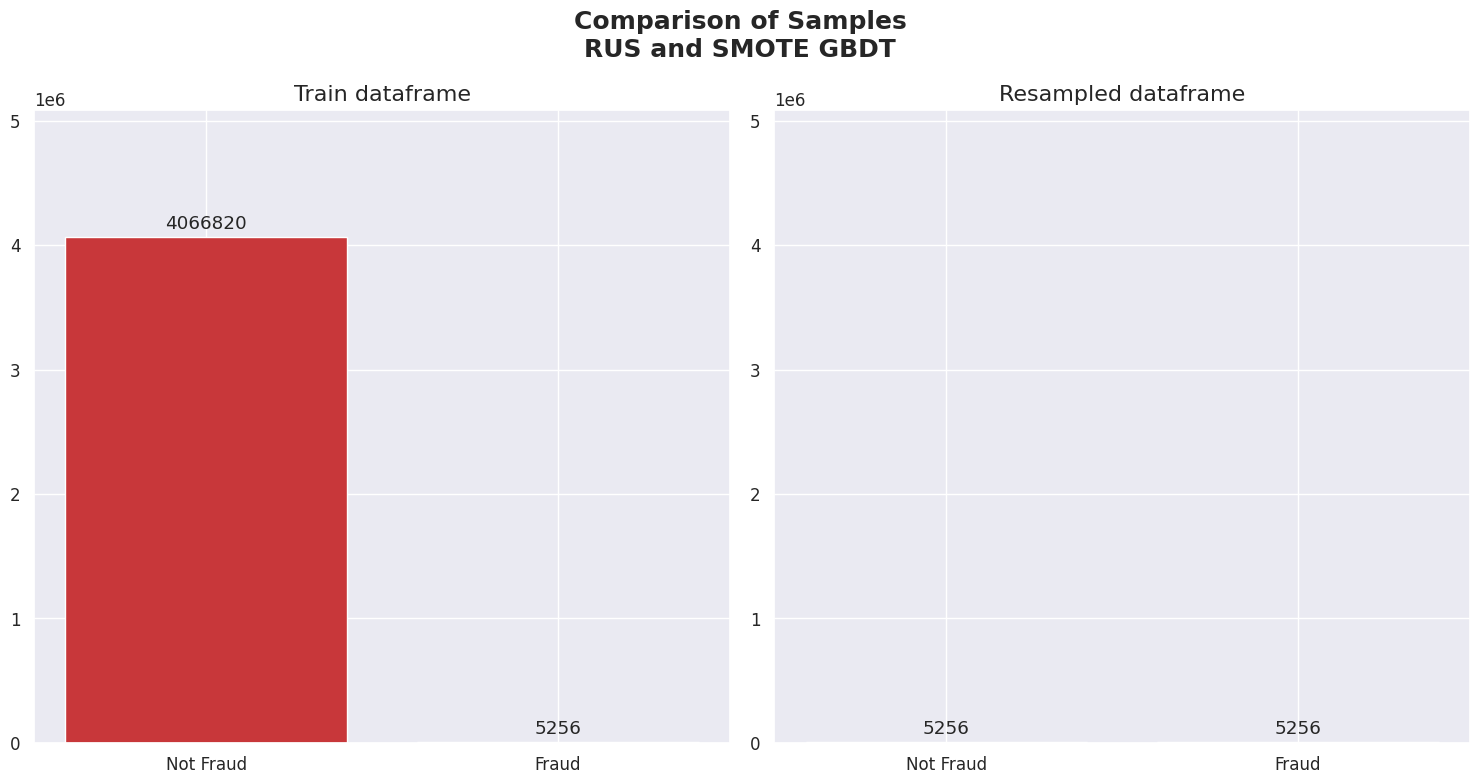

In [ ]:
plot_samples_side_by_side(y_train, y_train_resampled_smote, model_name)

In [ ]:
start_time_2 = time.time()
rus_smote = gbdt.fit(X_train_resampled_smote, y_train_resampled_smote)
end_time_2 = time.time()

execution_time = (end_time_1 - start_time_1) + (end_time_2 - start_time_2)

rus_smote_pred = rus_smote.predict(X_test)

In [ ]:
rus_smote_report = classification_report(y_test, rus_smote_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_rus_smote = pd.DataFrame(rus_smote_report).transpose()
df_rus_smote = df_rus_smote.drop('macro avg', axis=0)
df_rus_smote = df_rus_smote.drop('weighted avg', axis=0)
df_rus_smote = df_rus_smote.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99   1016706
       Fraud       0.06      0.99      0.11      1314

    accuracy                           0.98   1018020
   macro avg       0.53      0.99      0.55   1018020
weighted avg       1.00      0.98      0.99   1018020



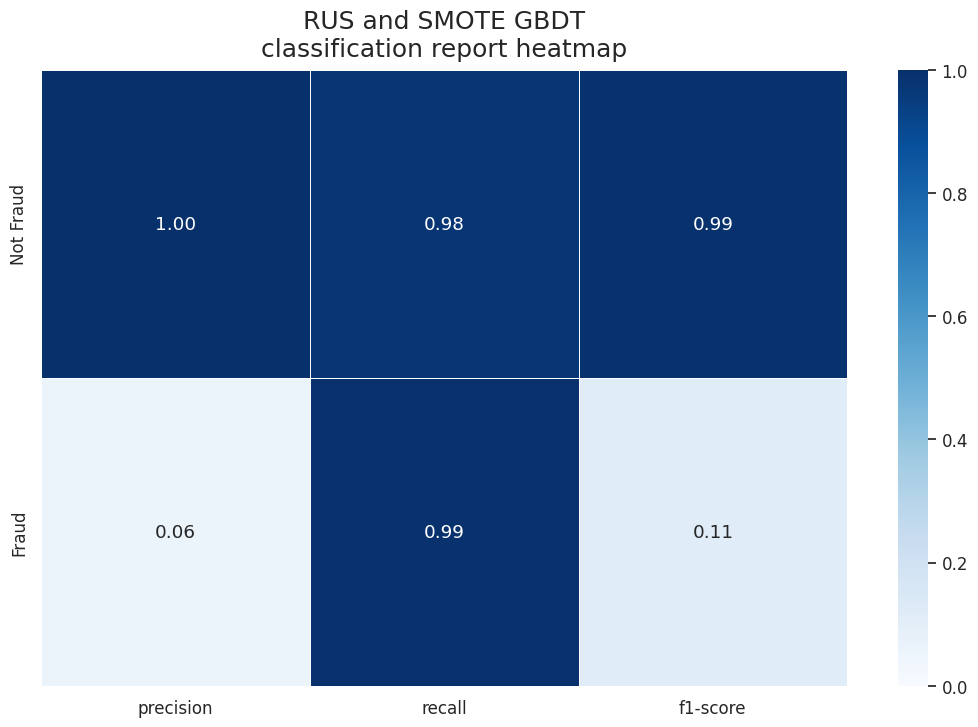

In [ ]:
print(classification_report(y_test, rus_smote_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_rus_smote, model_name)

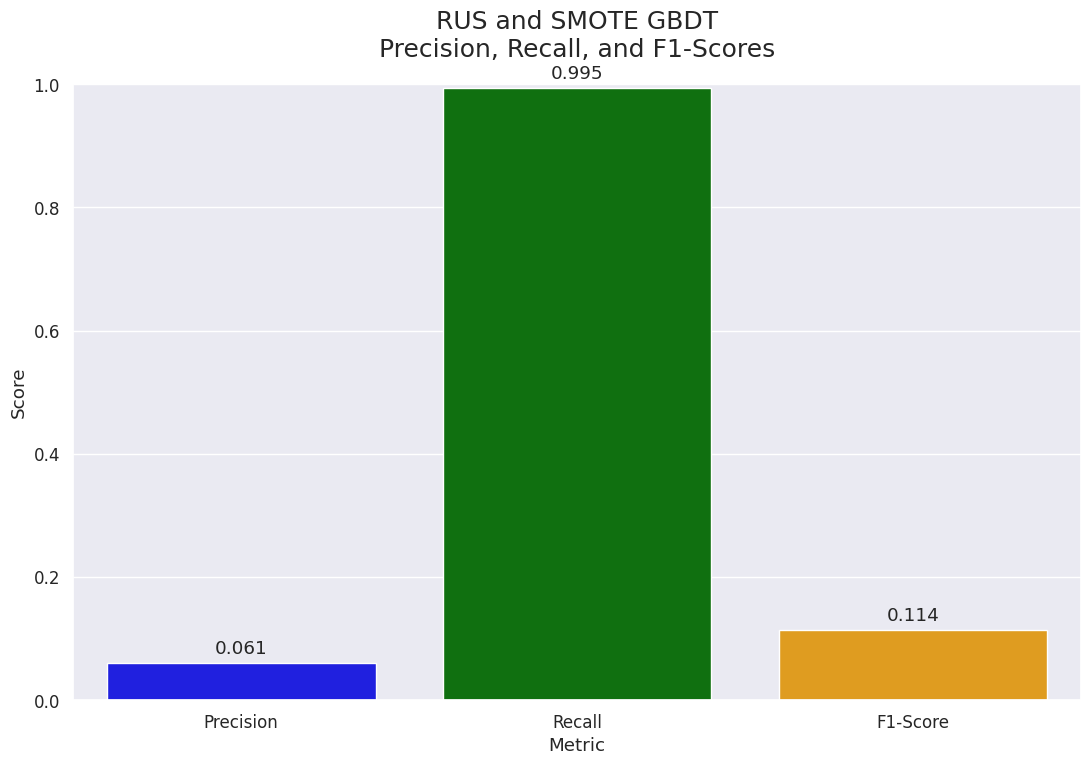

In [ ]:
df_rus_smote = df_rus_smote.drop('Not Fraud', axis=0)
df_rus_smote = df_rus_smote.drop('support', axis=1)

plot_classification_scores(df_rus_smote, model_name)

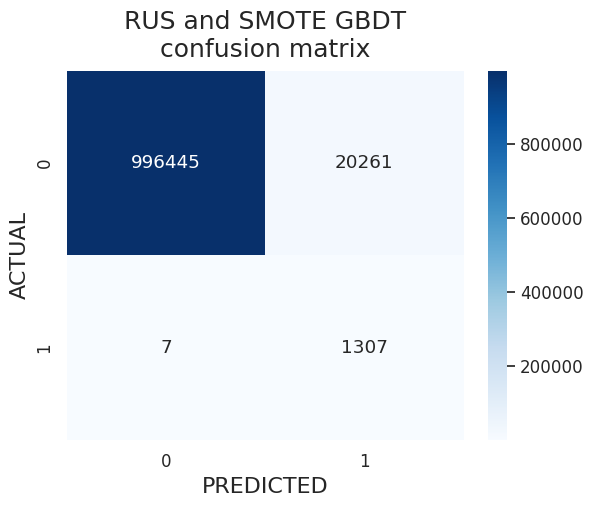

<Figure size 1300x800 with 0 Axes>

In [ ]:
# Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, rus_smote_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rus_smote_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, rus_smote_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643
2,Undersampling Majority Class GBDT,00:01,809,623430,12021,2,624239,12023,0.063,0.998,0.119,635451,811
3,SMOTE GBDT,45:23,1639,1248853,22028,4,1250492,22032,0.069,0.998,0.130,1270881,1643
4,RUS and SMOTE GBDT,00:03,1307,996445,20261,7,997752,20268,0.061,0.995,0.114,1016706,1314


In [ ]:
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
aucprc_scores = []
gmean_scores = []
mcc_scores = []

for train_index, test_index in kf.split(X, y):
    # Split data into training and validation folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_resampled, y_train_resampled)

    # Fit the classifier and make predictions
    gbdt.fit(X_train_resampled_smote, y_train_resampled_smote)
    y_pred = gbdt.predict(X_test)
    y_pred_proba = gbdt.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics for the current fold
    precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)

    # Append metrics to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    aucprc_scores.append(aucprc)
    gmean_scores.append(gmean)
    mcc_scores.append(mcc)

# Calculate the mean classification report across all folds
mean_precision = round(np.mean(precision_scores), 3)
mean_recall = round(np.mean(recall_scores), 3)
mean_f1 = round(np.mean(f1_scores), 3)
mean_aucprc = round(np.mean(aucprc_scores), 3)
mean_gmean = round(np.mean(gmean_scores), 3)
mean_mcc = round(np.mean(mcc_scores), 3)

std_precision = round(np.std(precision_scores), 3)
std_recall = round(np.std(recall_scores), 3)
std_f1 = round(np.std(f1_scores), 3)
std_aucprc = round(np.std(aucprc_scores), 3)
std_gmean = round(np.std(gmean_scores), 3)
std_mcc = round(np.std(mcc_scores), 3)

new_row = {
'model': model_name,
'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
'f1': str(mean_f1) + ' ± ' + str(std_f1),
'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
'precision': str(mean_precision) + ' ± ' + str(std_precision),
'recall': str(mean_recall) + ' ± ' + str(std_recall)
}

df_kfold_models = pd.concat([df_kfold_models, pd.DataFrame(new_row, index=[0])], ignore_index=True)
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.345 ± 0.223,0.327 ± 0.268,0.564 ± 0.269,0.362 ± 0.251,0.455 ± 0.305,0.392 ± 0.267
1,Oversampling Minority Class GBDT,0.847 ± 0.013,0.121 ± 0.003,0.989 ± 0.001,0.252 ± 0.003,0.065 ± 0.002,0.996 ± 0.002
2,Undersampling Majority Class GBDT,0.522 ± 0.038,0.12 ± 0.003,0.989 ± 0.001,0.25 ± 0.003,0.064 ± 0.002,0.997 ± 0.002
3,SMOTE GBDT,0.85 ± 0.013,0.13 ± 0.003,0.989 ± 0.001,0.261 ± 0.003,0.07 ± 0.002,0.995 ± 0.002
4,RUS and SMOTE GBDT,0.589 ± 0.157,0.112 ± 0.005,0.988 ± 0.001,0.241 ± 0.005,0.059 ± 0.003,0.996 ± 0.002


### Self-Paced Ensemble w/ GBDT n = 10 (Ensembled learning)

In [ ]:
from imbens.ensemble import SelfPacedEnsembleClassifier

X = data.drop('isfraud', axis=1)
y = data.isfraud

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = data.isfraud)

model_name = 'Self-paced Ensemble w/ GBDT n=10'

#XGB as base classifier
SPE_gbdt_clf = SelfPacedEnsembleClassifier(
    estimator=gbdt,
    n_estimators=10,
    random_state=42
    )

start_time = time.time()
SPE_gbdt_clf.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

SPE_gbdt_pred = SPE_gbdt_clf.predict(X_test)

In [ ]:
SPE_gbdt_report = classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_SPE_gbdt = pd.DataFrame(SPE_gbdt_report).transpose()
df_SPE_gbdt = df_SPE_gbdt.drop('macro avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('weighted avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.89      0.80      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.90      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



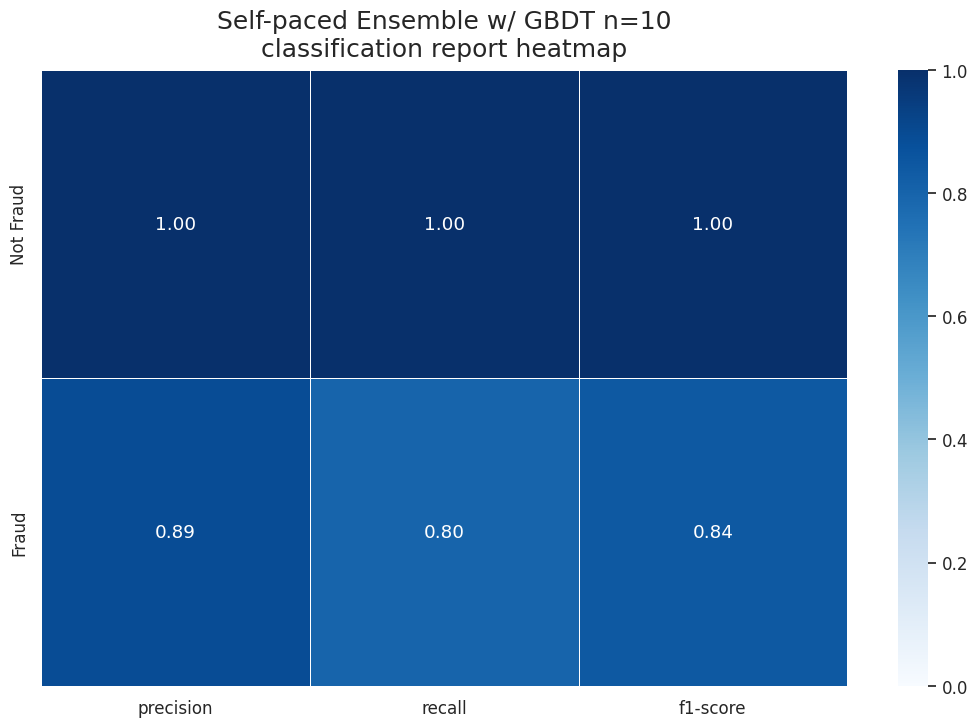

In [ ]:
print(classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_SPE_gbdt, model_name)

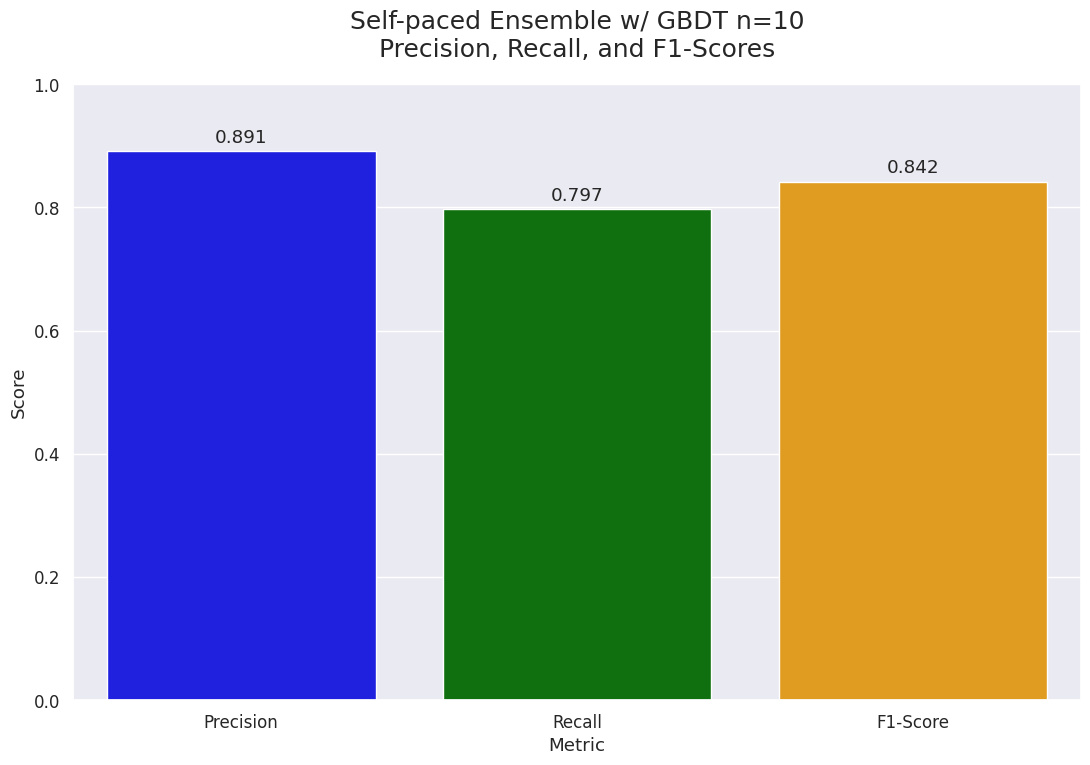

In [ ]:
df_SPE_gbdt = df_SPE_gbdt.drop('Not Fraud', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('support', axis=1)

plot_classification_scores(df_SPE_gbdt, model_name)

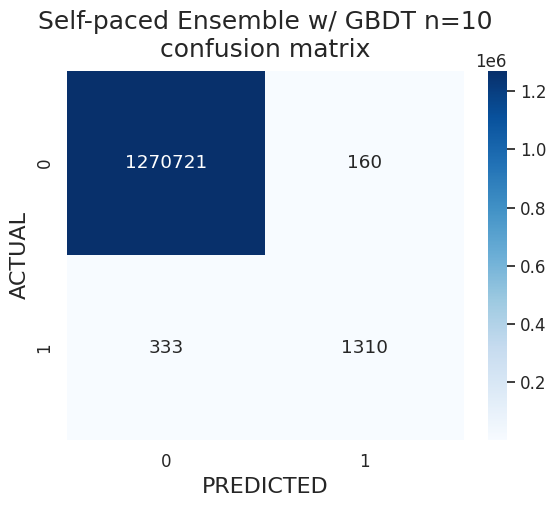

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, SPE_gbdt_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, SPE_gbdt_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, SPE_gbdt_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643
2,Undersampling Majority Class GBDT,00:01,809,623430,12021,2,624239,12023,0.063,0.998,0.119,635451,811
3,SMOTE GBDT,45:23,1639,1248853,22028,4,1250492,22032,0.069,0.998,0.130,1270881,1643
4,RUS and SMOTE GBDT,00:03,1307,996445,20261,7,997752,20268,0.061,0.995,0.114,1016706,1314
5,Self-paced Ensemble w/ GBDT n=10,01:52,1310,1270721,160,333,1272031,493,0.891,0.797,0.842,1270881,1643


In [ ]:
df_kfold_models = kfold_classifier(model_name, SPE_gbdt_clf, X, y, df_kfold_models)
df_kfold_models

[0.851, 0.851, 0.831, 0.853, 0.866, 0.836, 0.846, 0.839, 0.837, 0.827]


,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.345 ± 0.223,0.327 ± 0.268,0.564 ± 0.269,0.362 ± 0.251,0.455 ± 0.305,0.392 ± 0.267
1,Oversampling Minority Class GBDT,0.847 ± 0.013,0.121 ± 0.003,0.989 ± 0.001,0.252 ± 0.003,0.065 ± 0.002,0.996 ± 0.002
2,Undersampling Majority Class GBDT,0.522 ± 0.038,0.12 ± 0.003,0.989 ± 0.001,0.25 ± 0.003,0.064 ± 0.002,0.997 ± 0.002
3,SMOTE GBDT,0.85 ± 0.013,0.13 ± 0.003,0.989 ± 0.001,0.261 ± 0.003,0.07 ± 0.002,0.995 ± 0.002
4,RUS and SMOTE GBDT,0.589 ± 0.157,0.112 ± 0.005,0.988 ± 0.001,0.241 ± 0.005,0.059 ± 0.003,0.996 ± 0.002
5,Self-paced Ensemble w/ GBDT n=10,0.927 ± 0.006,0.844 ± 0.011,0.892 ± 0.01,0.845 ± 0.011,0.898 ± 0.011,0.796 ± 0.018


### Self-Paced Ensemble w/ GBDT n = 20

In [ ]:
from imbens.ensemble import SelfPacedEnsembleClassifier

X = data.drop('isfraud', axis=1)
y = data.isfraud

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = data.isfraud)

model_name = 'Self-paced Ensemble w/ GBDT n=20'

#XGB as base classifier
SPE_gbdt_clf = SelfPacedEnsembleClassifier(
    estimator=gbdt,
    n_estimators=20,
    random_state=42
    )

start_time = time.time()
SPE_gbdt_clf.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

SPE_gbdt_pred = SPE_gbdt_clf.predict(X_test)

In [ ]:
SPE_gbdt_report = classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_SPE_gbdt = pd.DataFrame(SPE_gbdt_report).transpose()
df_SPE_gbdt = df_SPE_gbdt.drop('macro avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('weighted avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.95      0.77      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



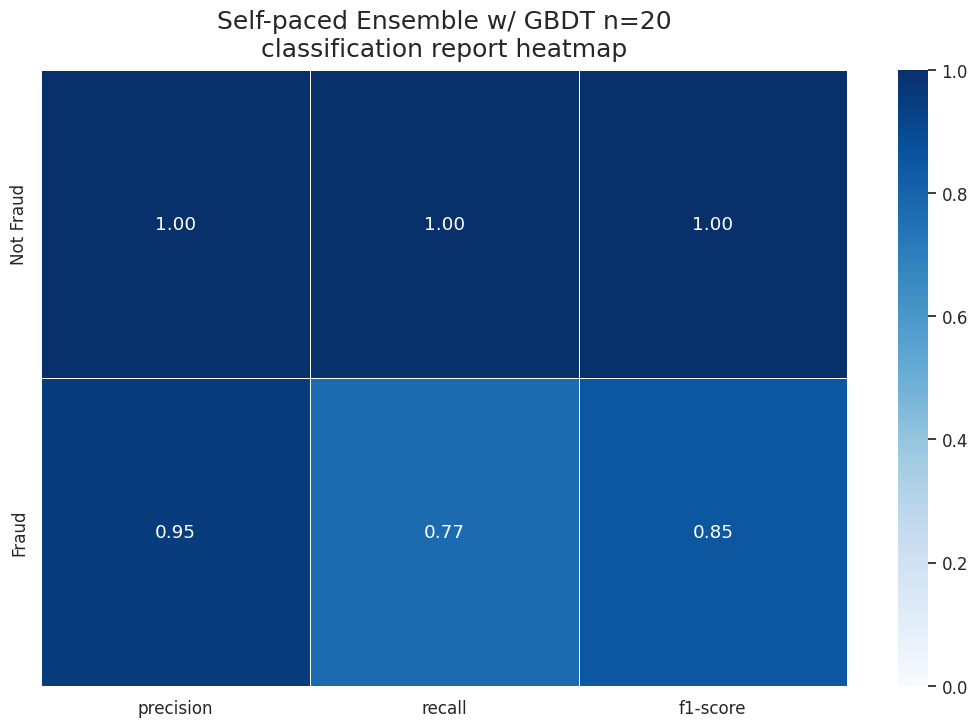

In [ ]:
print(classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_SPE_gbdt, model_name)

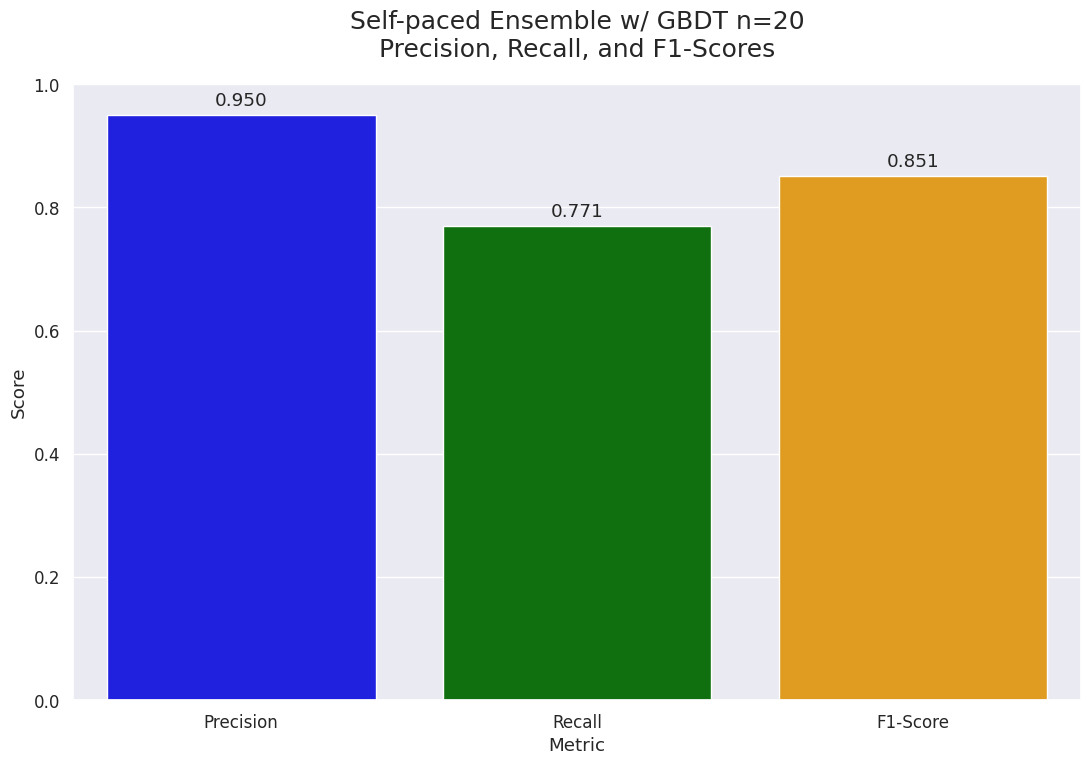

In [ ]:
df_SPE_gbdt = df_SPE_gbdt.drop('Not Fraud', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('support', axis=1)

plot_classification_scores(df_SPE_gbdt, model_name)

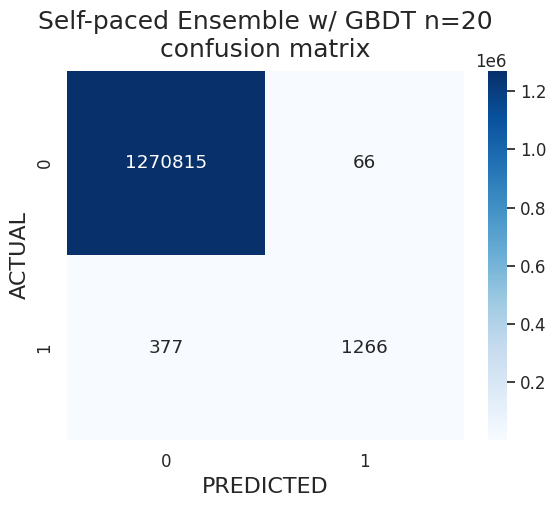

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, SPE_gbdt_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, SPE_gbdt_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, SPE_gbdt_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643
2,Undersampling Majority Class GBDT,00:01,809,623430,12021,2,624239,12023,0.063,0.998,0.119,635451,811
3,SMOTE GBDT,45:23,1639,1248853,22028,4,1250492,22032,0.069,0.998,0.130,1270881,1643
4,RUS and SMOTE GBDT,00:03,1307,996445,20261,7,997752,20268,0.061,0.995,0.114,1016706,1314
5,Self-paced Ensemble w/ GBDT n=10,01:52,1310,1270721,160,333,1272031,493,0.891,0.797,0.842,1270881,1643
6,Self-paced Ensemble w/ GBDT n=20,03:48,1266,1270815,66,377,1272081,443,0.950,0.771,0.851,1270881,1643


In [ ]:
df_kfold_models = kfold_classifier(model_name, SPE_gbdt_clf, X, y, df_kfold_models)
df_kfold_models

[0.856, 0.853, 0.839, 0.842, 0.871, 0.86, 0.872, 0.847, 0.852, 0.843]


,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.345 ± 0.223,0.327 ± 0.268,0.564 ± 0.269,0.362 ± 0.251,0.455 ± 0.305,0.392 ± 0.267
1,Oversampling Minority Class GBDT,0.847 ± 0.013,0.121 ± 0.003,0.989 ± 0.001,0.252 ± 0.003,0.065 ± 0.002,0.996 ± 0.002
2,Undersampling Majority Class GBDT,0.522 ± 0.038,0.12 ± 0.003,0.989 ± 0.001,0.25 ± 0.003,0.064 ± 0.002,0.997 ± 0.002
3,SMOTE GBDT,0.85 ± 0.013,0.13 ± 0.003,0.989 ± 0.001,0.261 ± 0.003,0.07 ± 0.002,0.995 ± 0.002
4,RUS and SMOTE GBDT,0.589 ± 0.157,0.112 ± 0.005,0.988 ± 0.001,0.241 ± 0.005,0.059 ± 0.003,0.996 ± 0.002
5,Self-paced Ensemble w/ GBDT n=10,0.927 ± 0.006,0.844 ± 0.011,0.892 ± 0.01,0.845 ± 0.011,0.898 ± 0.011,0.796 ± 0.018
6,Self-paced Ensemble w/ GBDT n=20,0.93 ± 0.009,0.854 ± 0.011,0.875 ± 0.009,0.859 ± 0.011,0.964 ± 0.012,0.766 ± 0.015


### Self-Paced Ensemble w/ GBDT n = 50

In [ ]:
from imbens.ensemble import SelfPacedEnsembleClassifier

X = data.drop('isfraud', axis=1)
y = data.isfraud

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = data.isfraud)

model_name = 'Self-paced Ensemble w/ GBDT n=50'

#XGB as base classifier
SPE_gbdt_clf = SelfPacedEnsembleClassifier(
    estimator=gbdt,
    n_estimators=50,
    random_state=42
    )

start_time = time.time()
SPE_gbdt_clf.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

SPE_gbdt_pred = SPE_gbdt_clf.predict(X_test)

In [ ]:
SPE_gbdt_report = classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_SPE_gbdt = pd.DataFrame(SPE_gbdt_report).transpose()
df_SPE_gbdt = df_SPE_gbdt.drop('macro avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('weighted avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.97      0.75      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



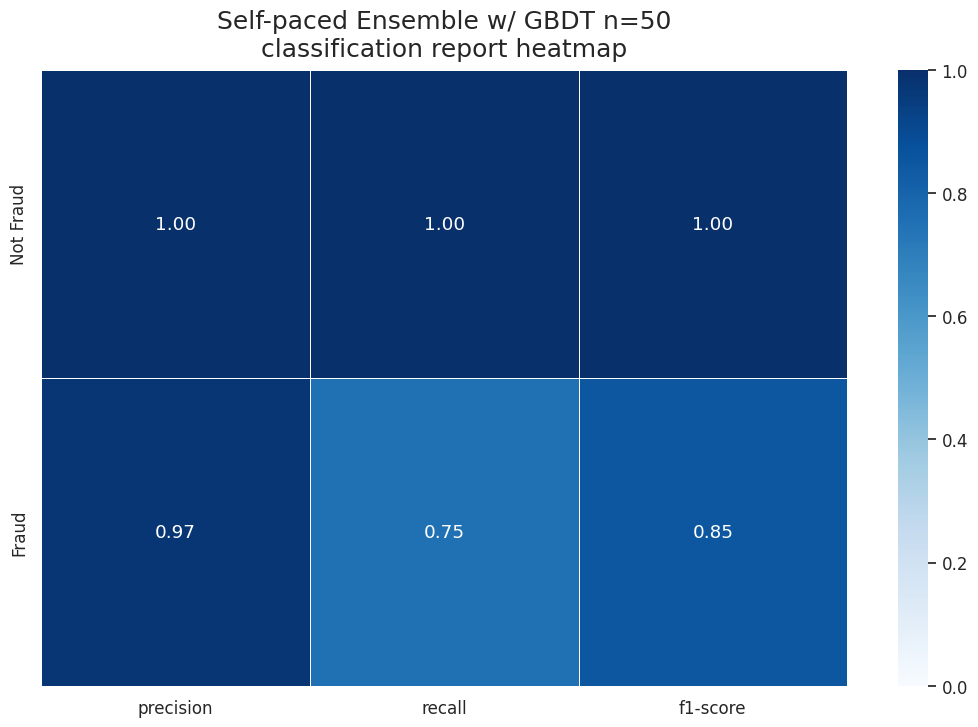

In [ ]:
print(classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_SPE_gbdt, model_name)

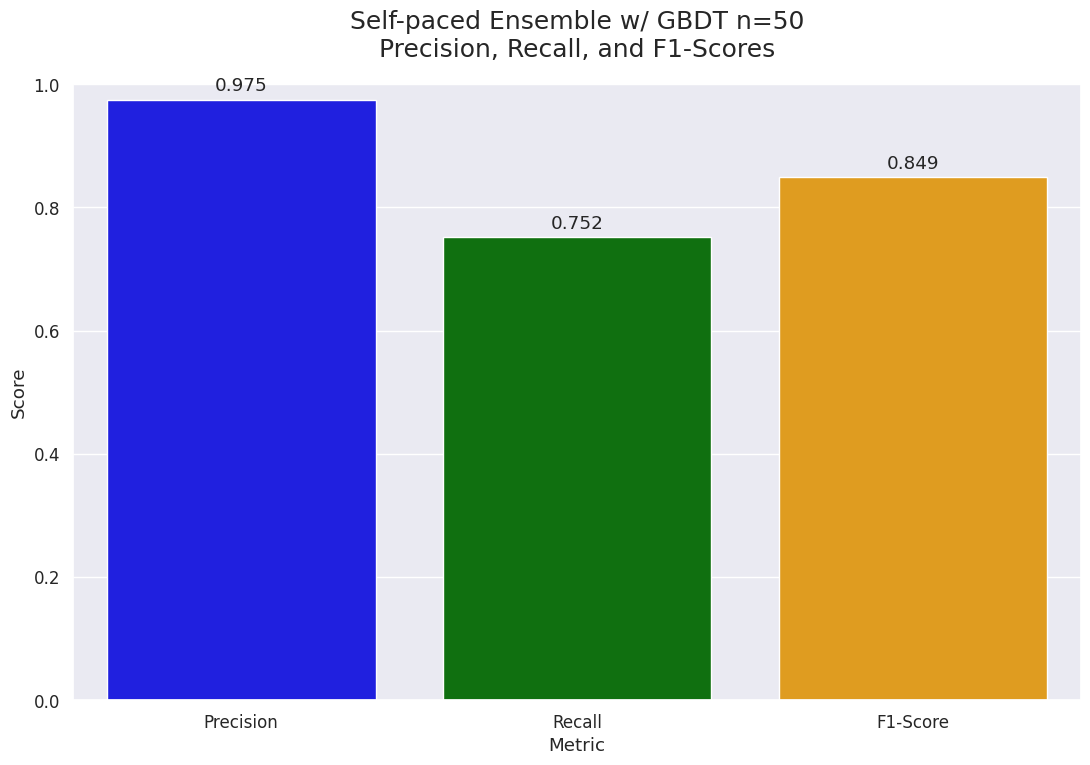

In [ ]:
df_SPE_gbdt = df_SPE_gbdt.drop('Not Fraud', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('support', axis=1)

plot_classification_scores(df_SPE_gbdt, model_name)

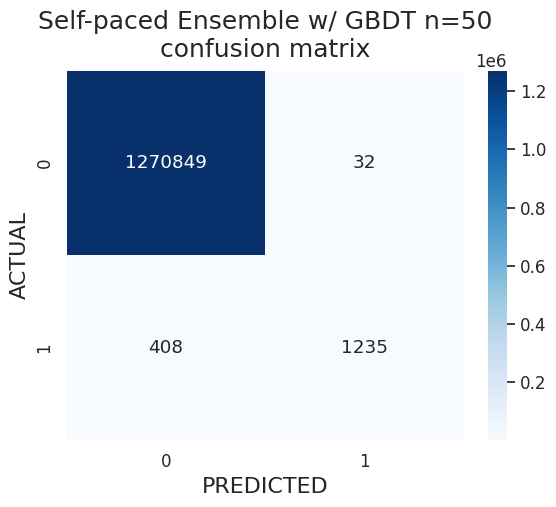

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, SPE_gbdt_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, SPE_gbdt_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, SPE_gbdt_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643
2,Undersampling Majority Class GBDT,00:01,809,623430,12021,2,624239,12023,0.063,0.998,0.119,635451,811
3,SMOTE GBDT,45:23,1639,1248853,22028,4,1250492,22032,0.069,0.998,0.130,1270881,1643
4,RUS and SMOTE GBDT,00:03,1307,996445,20261,7,997752,20268,0.061,0.995,0.114,1016706,1314
5,Self-paced Ensemble w/ GBDT n=10,01:52,1310,1270721,160,333,1272031,493,0.891,0.797,0.842,1270881,1643
6,Self-paced Ensemble w/ GBDT n=20,03:48,1266,1270815,66,377,1272081,443,0.950,0.771,0.851,1270881,1643
7,Self-paced Ensemble w/ GBDT n=50,09:35,1235,1270849,32,408,1272084,440,0.975,0.752,0.849,1270881,1643


In [ ]:
df_kfold_models = kfold_classifier(model_name, SPE_gbdt_clf, X, y, df_kfold_models)
df_kfold_models

[0.859, 0.854, 0.859, 0.845, 0.835, 0.837, 0.862, 0.84, 0.849, 0.866]


,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.345 ± 0.223,0.327 ± 0.268,0.564 ± 0.269,0.362 ± 0.251,0.455 ± 0.305,0.392 ± 0.267
1,Oversampling Minority Class GBDT,0.847 ± 0.013,0.121 ± 0.003,0.989 ± 0.001,0.252 ± 0.003,0.065 ± 0.002,0.996 ± 0.002
2,Undersampling Majority Class GBDT,0.522 ± 0.038,0.12 ± 0.003,0.989 ± 0.001,0.25 ± 0.003,0.064 ± 0.002,0.997 ± 0.002
3,SMOTE GBDT,0.85 ± 0.013,0.13 ± 0.003,0.989 ± 0.001,0.261 ± 0.003,0.07 ± 0.002,0.995 ± 0.002
4,RUS and SMOTE GBDT,0.589 ± 0.157,0.112 ± 0.005,0.988 ± 0.001,0.241 ± 0.005,0.059 ± 0.003,0.996 ± 0.002
5,Self-paced Ensemble w/ GBDT n=10,0.927 ± 0.006,0.844 ± 0.011,0.892 ± 0.01,0.845 ± 0.011,0.898 ± 0.011,0.796 ± 0.018
6,Self-paced Ensemble w/ GBDT n=20,0.93 ± 0.009,0.854 ± 0.011,0.875 ± 0.009,0.859 ± 0.011,0.964 ± 0.012,0.766 ± 0.015
7,Self-paced Ensemble w/ GBDT n=50,0.931 ± 0.006,0.851 ± 0.01,0.867 ± 0.01,0.858 ± 0.01,0.98 ± 0.006,0.752 ± 0.017


In [ ]:
from google.colab import files
df_kfold_models.to_csv('df_paysim_kfold_gbdt.csv', index=False)  # Set index=False to exclude the index column in the CSV

# Download the CSV file
files.download('df_paysim_kfold_gbdt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_models.to_csv('df_paysim_gbdt.csv', index=False)  # Set index=False to exclude the index column in the CSV

# Download the CSV file
files.download('df_paysim_gbdt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Machine Learning Pipeline






> Pipelines are extremely useful tools to write clean and manageable code for machine learning.Creating a model takes a many steps such as clean our data, transform it, potentially use feature selection, and then run a machine learning algorithm. Using pipelines, we can do all these steps in one go!



In [ ]:
#Load necessary libraries for ml pipeline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Assuming you have a dataset with features and labels
# X is the feature matrix, y is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = data.isfraud)

# Create an XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ('classifier', XGBClassifier(colsample_bytree = 1, gamma = 0.0, learning_rate = 0.2, max_depth = 10, n_estimators = 100, scale_pos_weight = 1))
])

# Fit the XGBoost model using the pipeline
xgb_pipeline.fit(X_train, y_train)

# Evaluate the model
predictions = xgb_pipeline.predict(X_test)

print(classification_report(y_test, predictions, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.94      0.78      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imbens.ensemble import SelfPacedEnsembleClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgboost = XGBClassifier(colsample_bytree = 1, gamma = 0.0, learning_rate = 0.2, max_depth = 10, n_estimators = 100, scale_pos_weight = 1, random_state = RANDOM_STATE)

# Apply SelfPacedEnsembleClassifier to the training data within the pipeline
SPEC_XGBoost_clf = SelfPacedEnsembleClassifier(
    estimator=xgboost,
    n_estimators=10,
    random_state=42
    )

# train the model
SPEC_XGBoost_clf.fit(X_train, y_train)
SPEC_XGBoost_pred = SPEC_XGBoost_clf.predict(X_test)

print(classification_report(y_test, SPEC_XGBoost_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.89      0.89      0.89      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.95      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



# Two-tailed unpaired t-test at 95% confidence interval

In [ ]:
from scipy.stats import ttest_ind

# F1 scores of Self-paced Ensemble Classifier with itself
f1_scores_self_paced_ensemble = [0.901, 0.893, 0.904, 0.896, 0.9, 0.891, 0.889, 0.891, 0.905, 0.903]  # Your F1 scores here

# F1 scores of Self-paced Ensemble Classifier with base XGBoost
f1_scores_base_rf = [0.856, 0.861, 0.886, 0.859, 0.866, 0.864, 0.861, 0.875, 0.871, 0.86]  # Your F1 scores here

# Perform the t-test
t_stat, p_value = ttest_ind(f1_scores_base_rf, f1_scores_self_paced_ensemble)

# Check the p-value to determine significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Failed to reject the null hypothesis: There is no significant difference between the groups.")

Reject the null hypothesis: There is a significant difference between the groups.


# Conclusion

In [ ]:
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643
2,Undersampling Majority Class GBDT,00:01,809,623430,12021,2,624239,12023,0.063,0.998,0.119,635451,811
3,SMOTE GBDT,45:23,1639,1248853,22028,4,1250492,22032,0.069,0.998,0.130,1270881,1643
4,RUS and SMOTE GBDT,00:03,1307,996445,20261,7,997752,20268,0.061,0.995,0.114,1016706,1314
5,Self-paced Ensemble w/ GBDT n=10,01:52,1310,1270721,160,333,1272031,493,0.891,0.797,0.842,1270881,1643
6,Self-paced Ensemble w/ GBDT n=20,03:48,1266,1270815,66,377,1272081,443,0.950,0.771,0.851,1270881,1643
7,Self-paced Ensemble w/ GBDT n=50,09:35,1235,1270849,32,408,1272084,440,0.975,0.752,0.849,1270881,1643


In [ ]:
# model with the highest precision
# Find the index of the row with the highest precision
max_precision_index = df_models['precision'].idxmax()

# Get the row with the highest precision
row_with_highest_precision = df_models.loc[max_precision_index]

print('Which model has the highest precision score? ')
print(row_with_highest_precision[0] + ' with a precision score of ' + str(row_with_highest_precision[8]))

Which model has the highest precision score? 
Self-paced Ensemble w/ GBDT n=50 with a precision score of 0.975


In [ ]:
# model with the highest recall
# Find the index of the row with the highest recall
max_recall_index = df_models['recall'].idxmax()

# Get the row with the highest precision
row_with_highest_recall = df_models.loc[max_recall_index]

print('Which model has the highest recall score? ')
print(row_with_highest_recall[0] + ' with a recall score of ' + str(row_with_highest_recall[9]))

Which model has the highest recall score? 
Gradient Boosting Decision Tree with a recall score of 1.0


In [ ]:
# model with the highest f1-score
# Find the index of the row with the highest f1-score
max_f1_index = df_models['f1'].idxmax()

# Get the row with the highest f1-score
row_with_highest_f1 = df_models.loc[max_f1_index]

print('Which model has the highest f1-score? ')
print(row_with_highest_f1[0] + ' with a f1-score of ' + str(row_with_highest_f1[10]))

Which model has the highest f1-score? 
Self-paced Ensemble w/ GBDT n=20 with a f1-score of 0.851


In [ ]:
# model with the least number of incorrect predicted transactions
# Find the index of the row with the least number of incorrect predicted transactions

df_models['incorrect'] = df_models['incorrect'].astype(np.int64)
min_incorrect_index = df_models['incorrect'].idxmin()

# Get the row with least number of incorrect predicted transactions
row_with_lowest_incorrect = df_models.loc[min_incorrect_index]

print('Which model has the least number of incorrect predicted transactions? ')
print(row_with_lowest_incorrect[0] + ' incorrectly predicted ' + str(row_with_lowest_incorrect[7]) + ' out of ' + str((int(row_with_lowest_incorrect[11]) + int(row_with_lowest_incorrect[12])))+ ' transactions')

Which model has the least number of incorrect predicted transactions? 
Self-paced Ensemble w/ GBDT n=50 incorrectly predicted 440 out of 1272524 transactions


In [ ]:
# model with the highest number of predicted fraud transactions
# Find the index of the row with the highest number of predicted fraud transactions

df_models['tp'] = df_models['tp'].astype(np.int64)
max_true_fraud_index = df_models['tp'].idxmax()

# Get the row with the highest number of predicted fraud transactions
row_with_highest_correct_fraud = df_models.loc[max_true_fraud_index]

print('Which model has the highest number of predicted fraud transactions? ')
print(row_with_highest_correct_fraud[0] + ' correctly predicted ' + str(row_with_highest_correct_fraud[6]) + ' out of ' + str(row_with_highest_correct_fraud[11])+ ' fraud transactions')

Which model has the highest number of predicted fraud transactions? 
SMOTE GBDT correctly predicted 1250492 out of 1270881 fraud transactions


In [ ]:
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,23:47,6,1270881,0,1637,1270887,1637,0.004,1.000,0.007,1272518,6
1,Oversampling Minority Class GBDT,34:58,1638,1247368,23513,5,1249006,23518,0.065,0.997,0.122,1270881,1643
2,Undersampling Majority Class GBDT,00:01,809,623430,12021,2,624239,12023,0.063,0.998,0.119,635451,811
3,SMOTE GBDT,45:23,1639,1248853,22028,4,1250492,22032,0.069,0.998,0.130,1270881,1643
4,RUS and SMOTE GBDT,00:03,1307,996445,20261,7,997752,20268,0.061,0.995,0.114,1016706,1314
5,Self-paced Ensemble w/ GBDT n=10,01:52,1310,1270721,160,333,1272031,493,0.891,0.797,0.842,1270881,1643
6,Self-paced Ensemble w/ GBDT n=20,03:48,1266,1270815,66,377,1272081,443,0.950,0.771,0.851,1270881,1643
7,Self-paced Ensemble w/ GBDT n=50,09:35,1235,1270849,32,408,1272084,440,0.975,0.752,0.849,1270881,1643


In [ ]:
result = df_models.iloc[:, [ 0, 8, 9, 10]]
result

,model,precision,recall,f1
0,Gradient Boosting Decision Tree,0.004,1.000,0.007
1,Oversampling Minority Class GBDT,0.065,0.997,0.122
2,Undersampling Majority Class GBDT,0.063,0.998,0.119
3,SMOTE GBDT,0.069,0.998,0.130
4,RUS and SMOTE GBDT,0.061,0.995,0.114
5,Self-paced Ensemble w/ GBDT n=10,0.891,0.797,0.842
6,Self-paced Ensemble w/ GBDT n=20,0.950,0.771,0.851
7,Self-paced Ensemble w/ GBDT n=50,0.975,0.752,0.849


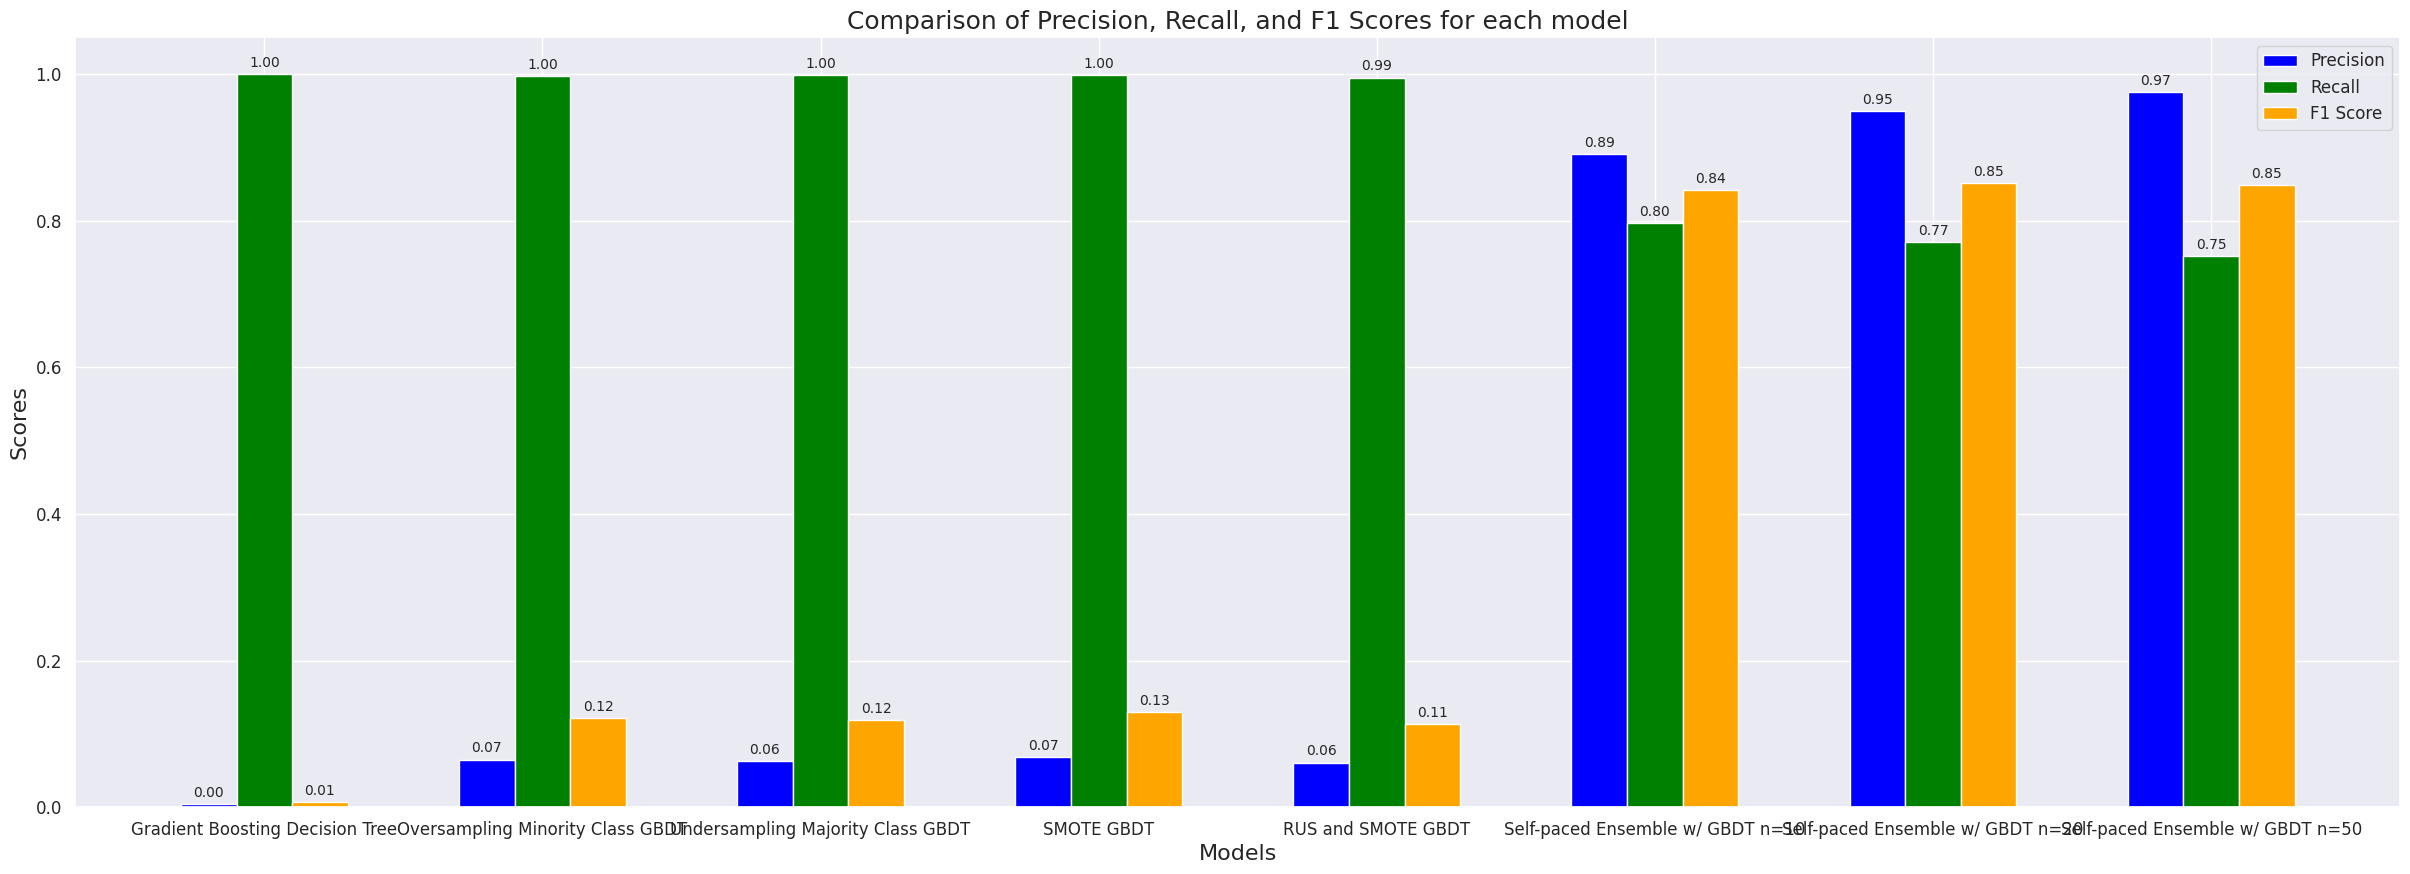

In [ ]:
classification_scores_comparison(result)

In [ ]:
result_f1_scores = result.iloc[:,[0, 3]]
result_f1_scores_sorted = result_f1_scores.sort_values(by='f1', ascending=True)

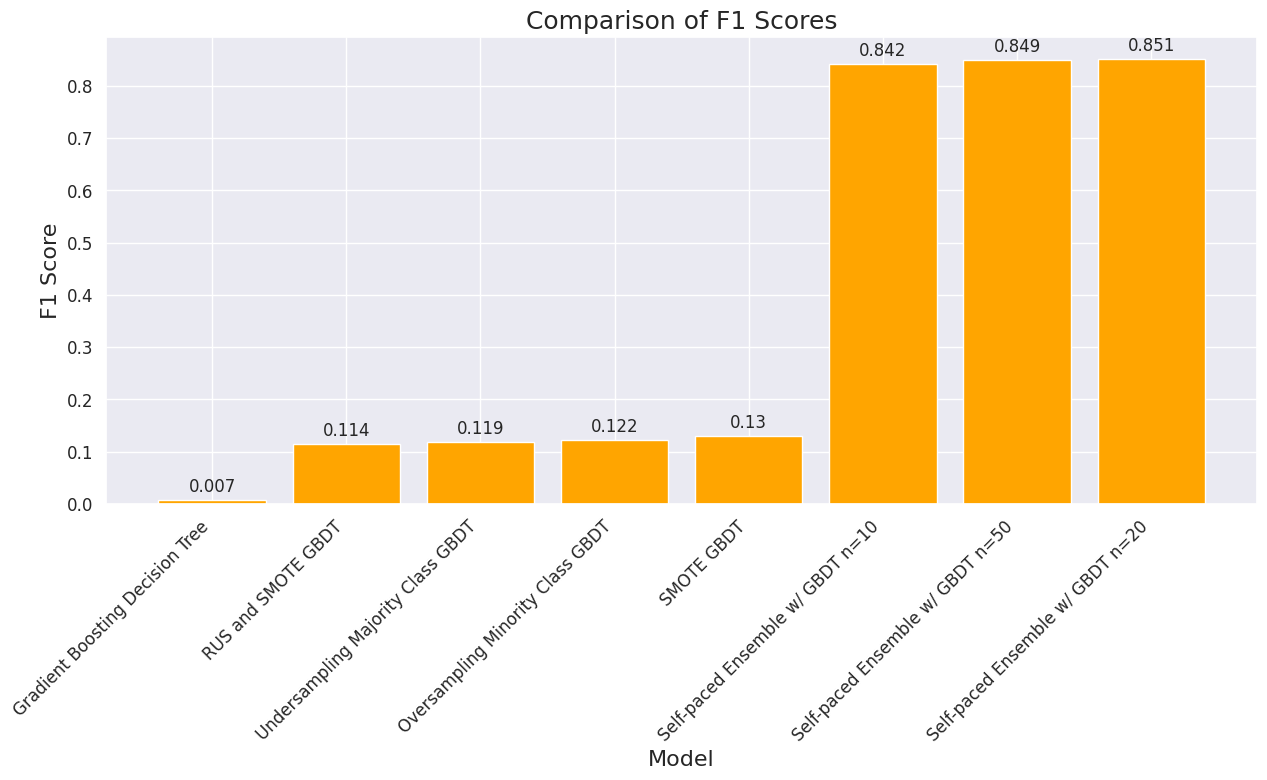

In [ ]:
plot_compare_f1_scores(result_f1_scores_sorted)

In [ ]:
df_models_executionTime = df_models.iloc[:, [ 0, 1]]
df_models_executionTime

,model,execution_Time
0,Gradient Boosting Decision Tree,23:47
1,Oversampling Minority Class GBDT,34:58
2,Undersampling Majority Class GBDT,00:01
3,SMOTE GBDT,45:23
4,RUS and SMOTE GBDT,00:03
5,Self-paced Ensemble w/ GBDT n=10,01:52
6,Self-paced Ensemble w/ GBDT n=20,03:48
7,Self-paced Ensemble w/ GBDT n=50,09:35


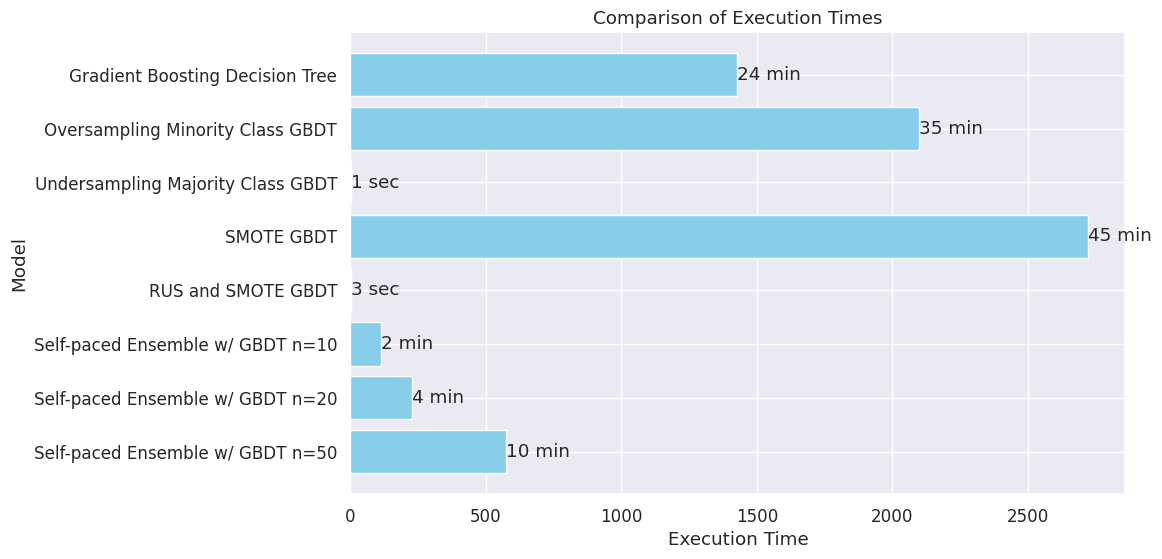

In [ ]:
# Convert time strings to seconds
def time_str_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

df_models_executionTime['execution_Seconds'] = [time_str_to_seconds(time) for time in df_models_executionTime['execution_Time']]

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(df_models_executionTime['model'], df_models_executionTime['execution_Seconds'], color='skyblue')

# Annotate each bar with its value
for bar, value in zip(bars, df_models_executionTime['execution_Seconds']):
    if value < 60:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.0f} sec',
                 va='center', ha='left')
    else:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value/60:.0f} min',
                 va='center', ha='left')

plt.xlabel('Execution Time')
plt.ylabel('Model')
plt.title('Comparison of Execution Times')
plt.gca().invert_yaxis()  # Invert y-axis to display the longest time at the top
plt.show()

The total number of fraud transactions were **8213** out of **6362620** transactions. These fraud transactions were either **CASH_OUT** or **TRANSFER** and were made from a **Customer to Customer** account.

Self-Paced Ensemble XGBoost xs  Gradient Boosting Decision Tree (GBDT)


*   AUCPRC: 0.966  >  0.944±0.001 paper
*   F1-Score: 0.891  >  0.885±0.001 paper
*   GM: 0.933  >   0.885±0.001 paper
*   MCC: 0.890  >  0.876±0.001 paper
*   Precision: 0.890 (no mencionado en el paper)
*   Recall: 0.892 (no mencionado en el paper)








